<h1 align='center'> 
<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" />
</h1>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395 Redes Neuronales Artificiales I-2022 </h1>

<H3 align='center'> Taller 1 - Redes Neuronales y Deep Learning </H3>
<hr style="height:2px;border:none"/>


# Integrantes Neurolef
- Rodrigo Cayazaya M.
- Francisco Reyes J.
- María Riveros C.


# Declaración de honestidad
El trabajo realizado es original y desarrollado por el equipo, producido mediante la conversación y ayuda mutua del equipo, en conformidad con el código de honor de la universidad.

# Contribución


Cada participante del grupo contribuyó en todo.

# Link del video

https://drive.google.com/drive/folders/1aJEeegGBC0Zob1OQQ8cEN_pVOW3lGub5?usp=sharing

# Temas  

* Arquitectura Básica de Redes Neuronales. 
* Entrenamiento de Redes Neuronales.
* Redes Feed-Forward Completamente Conectadas. 
* Redes Convolucionales. 

# Reglas & Formalidades

* Se deben formar equipos de 3 personas. En caso de problemas para formar equipos contacten a sus profesores y ayudantes.  
* Los equipos deben ser inscritos antes del 15 de abril eligiendo un nombre de fantasía que será usado para identificarlos en Kaggle y otras operaciones. Se les enviará un link para hacer esto. 
* Se debe respetar el Código de Honor del curso y del DI (Syllabus). Pueden reusar código visto en clases y/o recolectar código/ideas de otros sitios o papers, mencionando al autor y entregando un link a la fuente. 
* Si resultara necesaria la intervención de personas ajenas al grupo (e.g. experto) debe ser declarada y justificada.
* Tener roles dentro del equipo está muy bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado. 

# Entregables 


> * **Video:** Se debe preparar un video explicativo de **máximo 20 minutos** donde se describe la metodología utilizada, los resultados obtenidos y las conclusiones de la experiencia. 

> * **Código:** Se debe enviar un jupyter notebook con el código utilizado, de modo que sea posible **reproducir los resultados** presentados. Como alternativa, se puede entregar un link Github con el código fuente, incluyendo instrucciones precisas para ejecutar los experimentos. En cualquier caso (notebook o repo) el código debe estar ordenado y seccionado apropiadamente.

> * **Conformidad Ética:** Se debe incluir una breve declaración ética en que se indique que el trabajo que se está enviando es un trabajo original, desarollado por los autores en conformidad con todas reglas antes mencionadas. Se debe también mencionar brevemente cuál fue la contribución de cada miembro del equipo. La declaración puede ser parte del notebook o estar en un archivo dentro del repo.

> * **Defensa en vivo + video-conferencia:** Personas que deben asistir presencialmente el día de clases agendado para la discusión del taller serán sorteadas. Ese día se seleccionarán aleatoriamente algunos equipos que presentarán oralmente su trabajo ante el curso. Los autores serán evaluados considerando la discusión y debate que generen entre sus pares. Los puntos obtenidos (positivos o negativos) se sumarán a la nota final de taller.



# Fechas

> * Defensas: 29 de Abril, horario de clases.
> * Fecha de entrega de vídeo: 29 de Abril, horario de clases.
> * Fecha de entrega de Jupyter (notebook): 28 de Abril, pero se puede modificar la entrega hasta el 29 de Abril.


# Parte I - Pregunta de Investigación

Refute o evidencie experimentalmente una de las siguientes afirmaciones.

Elegir tema acá **usando el nombre del equipo**:

https://doodle.com/poll/qgw7h5xb72khqq9x?utm_source=poll&utm_medium=link



> **Hipótesis 17**: Considere problemas de clasificación en que se contamina una fracción P los datos de entrenamiento haciendo swaps aleatorios de las etiquetas. *Una red neuronal tiene la capacidad de predecir correctamente el conjunto de pruebas siempre y cuando P sea menor que 0.5.*

**Reglas mínimas**: Validar en al menos 2 dataset reales. Si la investigación lo amerita, se puede modificar el dataset para hacer evidente alguna propiedad (por ejemplo desbalancearlo).


## Imports y Carga de datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
#from keras.optimizers import SGD, Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout
from keras import optimizers
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


## Dataset 1: Hongos

In [ ]:
data_mush = pd.read_csv('mushrooms.csv')
data_mush.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [ ]:
data_mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
data_mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
for col in data_mush.columns:
  print(col , data_mush[col].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [ ]:
for col in data_mush.columns:
  print(col)
  print(data_mush[col].value_counts())

class
e    4208
p    3916
Name: class, dtype: int64
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
bruises
f    4748
t    3376
Name: bruises, dtype: int64
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
gill-size
b    5612
n    2512
Name: gill-size, dtype: int64
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64
stalk-root
b    3776
?  

In [ ]:
data_mush = data_mush[data_mush['stalk-root']!='?']

In [ ]:
lista = []
for col in data_mush.columns:
  valores = data_mush[col].value_counts(sort=False)
  for i in range(len(valores)):
    valor = valores[i]
    if(valor/8124 < 0.01): #1%
      columna = data_mush[col].unique()[i]
      lista.append((col,columna))

for l in lista:
  col,columna = l
  data_mush = data_mush[data_mush[col]!=columna]

In [ ]:
for col in data_mush.columns:
  if(len(data_mush[col].unique()) == 1):
    data_mush = data_mush.drop([col], axis=1)

In [ ]:
for col in data_mush.columns:
  print(col)
  print(data_mush[col].value_counts())

class
e    3336
p    2032
Name: class, dtype: int64
cap-shape
x    2780
f    2332
b     256
Name: cap-shape, dtype: int64
cap-surface
y    2100
f    2080
s    1188
Name: cap-surface, dtype: int64
cap-color
g    1680
n    1096
y    1024
w     824
e     576
b      96
p      72
Name: cap-color, dtype: int64
bruises
t    3048
f    2320
Name: bruises, dtype: int64
odor
n    2584
f    1584
a     376
l     376
p     256
c     192
Name: odor, dtype: int64
gill-spacing
c    4456
w     912
Name: gill-spacing, dtype: int64
gill-size
b    4808
n     560
Name: gill-size, dtype: int64
gill-color
p    1360
n     960
w     824
h     720
g     624
u     480
k     400
Name: gill-color, dtype: int64
stalk-shape
t    2832
e    2536
Name: stalk-shape, dtype: int64
stalk-root
b    3576
e    1088
c     512
r     192
Name: stalk-root, dtype: int64
stalk-surface-above-ring
s    3544
k    1296
f     528
Name: stalk-surface-above-ring, dtype: int64
stalk-surface-below-ring
s    3352
k    1296
f     528
y     192

### Preprocesamiento

### Pipeline 1: One-hot encoding

#### One-hot-encoding

In [ ]:
columnas = data_mush.columns[1:]
columnas

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
data_prepro = pd.get_dummies(data_mush, columns = columnas)
data_prepro

,class,cap-shape_b,cap-shape_f,cap-shape_x,cap-surface_f,cap-surface_s,cap-surface_y,cap-color_b,cap-color_e,cap-color_g,...,population_a,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_m,habitat_p,habitat_u
0,p,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,e,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,e,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,p,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,e,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,e,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
7919,e,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7940,e,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
7965,e,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### Pipeline 2: Replace

In [ ]:
columnas = data_mush.columns[1:]
columnas

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
data_prepro = data_mush.copy()
for col in columnas:
  i = len(data_prepro[col].unique())
  for a,b in zip(range(i),data_prepro[col].unique()):
    data_prepro[col].replace(b, a, inplace=True)

In [ ]:
data_prepro

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,p,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,e,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,1
2,e,1,0,2,0,2,0,1,1,0,1,0,0,0,0,0,0,1,1,2
3,p,0,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,e,0,0,3,1,3,1,1,0,1,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,e,2,1,3,0,3,0,1,4,0,2,0,0,0,0,1,0,3,3,4
7919,e,2,1,5,0,3,0,1,4,0,2,0,0,0,0,1,0,3,3,4
7940,e,2,1,3,0,3,0,1,4,0,2,0,0,0,0,1,0,3,4,4
7965,e,0,1,0,0,3,0,1,4,0,2,0,0,0,0,1,0,3,4,4


### División de la data

In [ ]:
data_prepro['class'].replace('p', 0, inplace=True)
data_prepro['class'].replace('e', 1, inplace=True)
data_prepro['class'].unique()

array([0, 1])

In [ ]:
data_prepro['class'].value_counts()

1    3336
0    2032
Name: class, dtype: int64

In [ ]:
y = data_prepro['class']
X = data_prepro.drop(['class'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3757, 19)
(1611, 19)
(3757,)
(1611,)


### Modelo

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(19,), activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(60,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(2,activation="sigmoid"))
#0.1 , 0.001, 0.0001
opt = tf.keras.optimizers.Adam(0.001) #impacto en velocidad de convergencia y calidad del minimo (Descenso del gradiente(learning rate))
# Si el learning rate es muy grande, la optimización se hará a pasos grandes. Más chico, más sofisticado
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)

In [ ]:
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_187 (Dense)           (None, 100)               2000      
                                                                 
 dense_188 (Dense)           (None, 80)                8080      
                                                                 
 dense_189 (Dense)           (None, 60)                4860      
                                                                 
 dense_190 (Dense)           (None, 40)                2440      
                                                                 
 dense_191 (Dense)           (None, 20)                820       
                                                                 
 dense_192 (Dense)           (None, 10)                210       
                                                                 
 dense_193 (Dense)           (None, 5)               

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #straify...

#estandarizacion
X_train_2 /= 255 
X_val /= 255
X_test /= 255

n_classes = 2
#las redes reciben one hots.....
target_train = to_categorical(y_train_2, n_classes)
target_val = to_categorical(y_val, n_classes)
target_test = to_categorical(y_test, n_classes)

print("Formas Targets: ", target_train.shape, target_val.shape, target_test.shape)

Formas Targets:  (3005, 2) (752, 2) (1611, 2)


In [ ]:
history = model.fit(X_train_2, target_train, batch_size=5, epochs=20, verbose=2, validation_data=(X_val, target_val))

Epoch 1/20
601/601 - 2s - loss: 0.4818 - accuracy: 0.7727 - val_loss: 0.2737 - val_accuracy: 0.9082 - 2s/epoch - 3ms/step
Epoch 2/20
601/601 - 1s - loss: 0.2443 - accuracy: 0.9121 - val_loss: 0.2038 - val_accuracy: 0.9309 - 1s/epoch - 2ms/step
Epoch 3/20
601/601 - 1s - loss: 0.1968 - accuracy: 0.9281 - val_loss: 0.1393 - val_accuracy: 0.9415 - 1s/epoch - 2ms/step
Epoch 4/20
601/601 - 1s - loss: 0.1379 - accuracy: 0.9421 - val_loss: 0.1162 - val_accuracy: 0.9521 - 1s/epoch - 2ms/step
Epoch 5/20
601/601 - 1s - loss: 0.0868 - accuracy: 0.9651 - val_loss: 0.0489 - val_accuracy: 0.9721 - 1s/epoch - 2ms/step
Epoch 6/20
601/601 - 1s - loss: 0.0517 - accuracy: 0.9794 - val_loss: 0.0214 - val_accuracy: 0.9947 - 1s/epoch - 2ms/step
Epoch 7/20
601/601 - 1s - loss: 0.0477 - accuracy: 0.9857 - val_loss: 0.0089 - val_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 8/20
601/601 - 1s - loss: 0.0309 - accuracy: 0.9927 - val_loss: 0.0049 - val_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 9/20
601/601 - 1s 

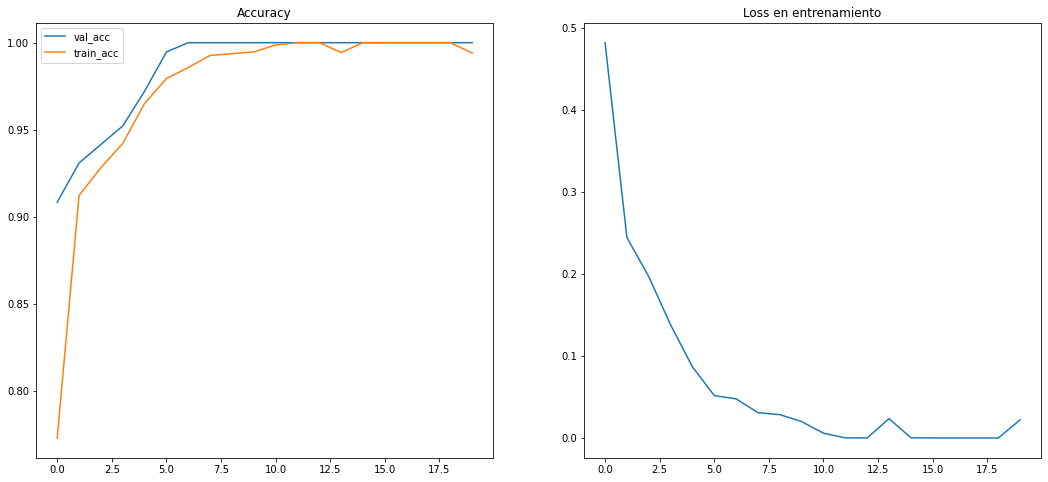

In [ ]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2, figsize=(18,8))
axis[0].plot(history.history['val_accuracy'], label='val_acc')
axis[0].plot(history.history['accuracy'], label='train_acc')
axis[0].set_title("Accuracy")
axis[0].legend()
axis[1].plot(history.history['loss'], label='loss')
axis[1].set_title("Loss en entrenamiento")
plt.show()

51/51 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 0.9969
[0.01346813514828682, 0.9968963265419006]
(1611, 2) (1611, 2)

Confusion Matrix



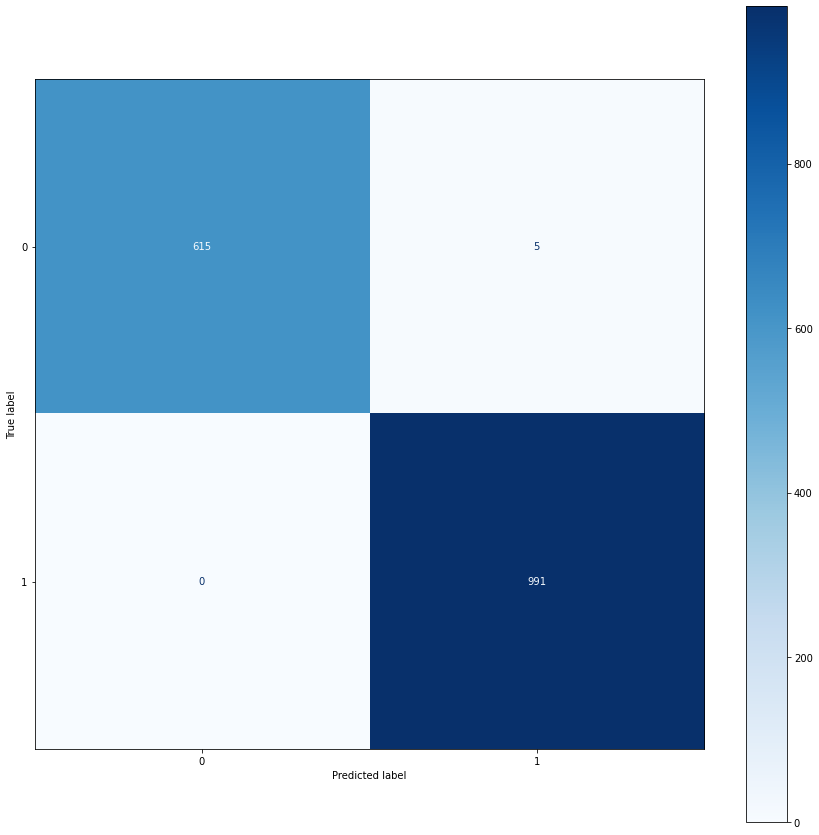


Classification Report

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       620
           1       0.99      1.00      1.00       991

    accuracy                           1.00      1611
   macro avg       1.00      1.00      1.00      1611
weighted avg       1.00      1.00      1.00      1611



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred = model.predict(X_test)
print(model.evaluate(X_test, target_test))
print(Y_pred.shape,target_test.shape)

# hay deshacer el one hot
y_pred_crisp = np.argmax(Y_pred, axis=1)
y_test_crisp = np.argmax(target_test, axis=1)

target_names = [str(i) for i in range(2)]

print("\nConfusion Matrix\n")
fig, ax = plt.subplots(figsize=(15, 15))
cm = confusion_matrix(y_test_crisp, y_pred_crisp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

print("\nClassification Report\n")

print(classification_report(y_test_crisp, y_pred_crisp, target_names=target_names))

### Swap

In [ ]:
import random

def swap(P, y):
  l = random.sample(y.index.values.tolist(), int(len(y)*P))
  for pos in l:
    if(y[pos] == 0):
      y[pos] = 1
    else:
      y[pos] = 0
  return y

In [ ]:
y_01 = y_train.copy()
y_03 = y_train.copy()
y_05 = y_train.copy()
y_07 = y_train.copy()
y_09 = y_train.copy()

In [ ]:
y_01 = swap(0.1,y_01)
y_03 = swap(0.3,y_03)
y_05 = swap(0.5,y_05)
y_07 = swap(0.7,y_07)
y_09 = swap(0.9,y_09)

### Modelos

In [ ]:
def modelo(model):
  model.add(Dense(100, input_shape=(19,), activation="relu"))
  model.add(Dense(80,activation="relu"))
  model.add(Dense(60,activation="relu"))
  model.add(Dense(40,activation="relu"))
  model.add(Dense(20,activation="relu"))
  model.add(Dense(10,activation="relu"))
  model.add(Dense(5,activation="relu"))
  model.add(Dense(2,activation="sigmoid"))
  opt = tf.keras.optimizers.Adam(0.001)
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)
  return model

In [ ]:
def preparacion(X_train,y_test,y_train):
  X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #straify...

  #estandarizacion
  X_train_2 /= 255 
  X_val /= 255

  n_classes = 2
  #las redes reciben one hots.....
  target_train = to_categorical(y_train_2, n_classes)
  target_val = to_categorical(y_val, n_classes)
  target_test = to_categorical(y_test, n_classes)
  return (target_train,target_val,target_test,X_val,X_train_2)


In [ ]:
model_01 = Sequential()
model_01 = modelo(model_01)
target_train_01,target_val_01,target_test_01,X_val_01,X_train_01 = preparacion(X_train,y_test,y_01)
history_01 = model_01.fit(X_train_01, target_train_01, batch_size=5, epochs=20, verbose=2, validation_data=(X_val_01, target_val_01))

Epoch 1/20
601/601 - 2s - loss: 0.5574 - accuracy: 0.7431 - val_loss: 0.4613 - val_accuracy: 0.8152 - 2s/epoch - 4ms/step
Epoch 2/20
601/601 - 1s - loss: 0.4454 - accuracy: 0.8303 - val_loss: 0.4166 - val_accuracy: 0.8564 - 1s/epoch - 2ms/step
Epoch 3/20
601/601 - 1s - loss: 0.4289 - accuracy: 0.8436 - val_loss: 0.3967 - val_accuracy: 0.8644 - 1s/epoch - 2ms/step
Epoch 4/20
601/601 - 1s - loss: 0.4168 - accuracy: 0.8476 - val_loss: 0.3989 - val_accuracy: 0.8644 - 1s/epoch - 2ms/step
Epoch 5/20
601/601 - 1s - loss: 0.4082 - accuracy: 0.8456 - val_loss: 0.4520 - val_accuracy: 0.8231 - 1s/epoch - 2ms/step
Epoch 6/20
601/601 - 1s - loss: 0.3817 - accuracy: 0.8619 - val_loss: 0.3694 - val_accuracy: 0.8644 - 1s/epoch - 2ms/step
Epoch 7/20
601/601 - 1s - loss: 0.3577 - accuracy: 0.8815 - val_loss: 0.3579 - val_accuracy: 0.8750 - 1s/epoch - 2ms/step
Epoch 8/20
601/601 - 1s - loss: 0.3480 - accuracy: 0.8889 - val_loss: 0.3241 - val_accuracy: 0.8976 - 1s/epoch - 2ms/step
Epoch 9/20
601/601 - 1s 

In [ ]:
model_03 = Sequential()
model_03 = modelo(model_03)
target_train_03,target_val_03,target_test_03,X_val_03,X_train_03 = preparacion(X_train,y_test,y_03)
history_03 = model_03.fit(X_train_03, target_train_03, batch_size=5, epochs=20, verbose=2, validation_data=(X_val_03, target_val_03))

Epoch 1/20
601/601 - 2s - loss: 0.6880 - accuracy: 0.5544 - val_loss: 0.6819 - val_accuracy: 0.5359 - 2s/epoch - 4ms/step
Epoch 2/20
601/601 - 1s - loss: 0.6733 - accuracy: 0.5591 - val_loss: 0.6694 - val_accuracy: 0.6463 - 1s/epoch - 2ms/step
Epoch 3/20
601/601 - 1s - loss: 0.6668 - accuracy: 0.6379 - val_loss: 0.6653 - val_accuracy: 0.6543 - 1s/epoch - 2ms/step
Epoch 4/20
601/601 - 1s - loss: 0.6598 - accuracy: 0.6443 - val_loss: 0.6588 - val_accuracy: 0.6463 - 1s/epoch - 2ms/step
Epoch 5/20
601/601 - 1s - loss: 0.6512 - accuracy: 0.6542 - val_loss: 0.6446 - val_accuracy: 0.6596 - 1s/epoch - 2ms/step
Epoch 6/20
601/601 - 1s - loss: 0.6480 - accuracy: 0.6602 - val_loss: 0.6363 - val_accuracy: 0.6742 - 1s/epoch - 2ms/step
Epoch 7/20
601/601 - 1s - loss: 0.6424 - accuracy: 0.6636 - val_loss: 0.6320 - val_accuracy: 0.6835 - 1s/epoch - 2ms/step
Epoch 8/20
601/601 - 2s - loss: 0.6402 - accuracy: 0.6622 - val_loss: 0.6314 - val_accuracy: 0.6809 - 2s/epoch - 2ms/step
Epoch 9/20
601/601 - 1s 

In [ ]:
model_05 = Sequential()
model_05 = modelo(model_05)
target_train_05,target_val_05,target_test_05,X_val_05,X_train_05 = preparacion(X_train,y_test,y_05)
history_05 = model_05.fit(X_train_05, target_train_05, batch_size=5, epochs=20, verbose=2, validation_data=(X_val_05, target_val_05))

Epoch 1/20
601/601 - 2s - loss: 0.6932 - accuracy: 0.4915 - val_loss: 0.6930 - val_accuracy: 0.5279 - 2s/epoch - 4ms/step
Epoch 2/20
601/601 - 1s - loss: 0.6933 - accuracy: 0.4902 - val_loss: 0.6931 - val_accuracy: 0.5279 - 1s/epoch - 2ms/step
Epoch 3/20
601/601 - 1s - loss: 0.6932 - accuracy: 0.4908 - val_loss: 0.6930 - val_accuracy: 0.5279 - 1s/epoch - 2ms/step
Epoch 4/20
601/601 - 1s - loss: 0.6933 - accuracy: 0.4862 - val_loss: 0.6930 - val_accuracy: 0.5279 - 1s/epoch - 2ms/step
Epoch 5/20
601/601 - 1s - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5279 - 1s/epoch - 2ms/step
Epoch 6/20
601/601 - 1s - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6932 - val_accuracy: 0.4721 - 1s/epoch - 2ms/step
Epoch 7/20
601/601 - 1s - loss: 0.6933 - accuracy: 0.4855 - val_loss: 0.6933 - val_accuracy: 0.4721 - 1s/epoch - 2ms/step
Epoch 8/20
601/601 - 1s - loss: 0.6933 - accuracy: 0.4769 - val_loss: 0.6931 - val_accuracy: 0.5279 - 1s/epoch - 2ms/step
Epoch 9/20
601/601 - 1s 

In [ ]:
model_07 = Sequential()
model_07 = modelo(model_07)
target_train_07,target_val_07,target_test_07,X_val_07,X_train_07 = preparacion(X_train,y_test,y_07)
history_07 = model_07.fit(X_train_07, target_train_07, batch_size=5, epochs=20, verbose=2, validation_data=(X_val_07, target_val_07))

Epoch 1/20
601/601 - 2s - loss: 0.6914 - accuracy: 0.5464 - val_loss: 0.6897 - val_accuracy: 0.5505 - 2s/epoch - 4ms/step
Epoch 2/20
601/601 - 1s - loss: 0.6896 - accuracy: 0.5468 - val_loss: 0.6886 - val_accuracy: 0.5505 - 1s/epoch - 2ms/step
Epoch 3/20
601/601 - 1s - loss: 0.6891 - accuracy: 0.5468 - val_loss: 0.6883 - val_accuracy: 0.5505 - 1s/epoch - 2ms/step
Epoch 4/20
601/601 - 1s - loss: 0.6889 - accuracy: 0.5468 - val_loss: 0.6881 - val_accuracy: 0.5505 - 1s/epoch - 2ms/step
Epoch 5/20
601/601 - 1s - loss: 0.6889 - accuracy: 0.5468 - val_loss: 0.6881 - val_accuracy: 0.5505 - 1s/epoch - 2ms/step
Epoch 6/20
601/601 - 1s - loss: 0.6889 - accuracy: 0.5468 - val_loss: 0.6881 - val_accuracy: 0.5505 - 1s/epoch - 2ms/step
Epoch 7/20
601/601 - 1s - loss: 0.6889 - accuracy: 0.5468 - val_loss: 0.6881 - val_accuracy: 0.5505 - 1s/epoch - 2ms/step
Epoch 8/20
601/601 - 1s - loss: 0.6889 - accuracy: 0.5468 - val_loss: 0.6880 - val_accuracy: 0.5505 - 1s/epoch - 2ms/step
Epoch 9/20
601/601 - 1s 

In [ ]:
model_09 = Sequential()
model_09 = modelo(model_09)
target_train_09,target_val_09,target_test_09,X_val_09,X_train_09 = preparacion(X_train,y_test,y_09)
history_09 = model_09.fit(X_train_09, target_train_09, batch_size=5, epochs=20, verbose=2, validation_data=(X_val_09, target_val_09))

Epoch 1/20
601/601 - 2s - loss: 0.6782 - accuracy: 0.5870 - val_loss: 0.6321 - val_accuracy: 0.6250 - 2s/epoch - 4ms/step
Epoch 2/20
601/601 - 1s - loss: 0.5829 - accuracy: 0.6938 - val_loss: 0.4957 - val_accuracy: 0.8245 - 1s/epoch - 2ms/step
Epoch 3/20
601/601 - 1s - loss: 0.5088 - accuracy: 0.8203 - val_loss: 0.4429 - val_accuracy: 0.8590 - 1s/epoch - 2ms/step
Epoch 4/20
601/601 - 1s - loss: 0.4641 - accuracy: 0.8399 - val_loss: 0.5329 - val_accuracy: 0.7513 - 1s/epoch - 2ms/step
Epoch 5/20
601/601 - 1s - loss: 0.4315 - accuracy: 0.8612 - val_loss: 0.3900 - val_accuracy: 0.8843 - 1s/epoch - 2ms/step
Epoch 6/20
601/601 - 1s - loss: 0.4133 - accuracy: 0.8676 - val_loss: 0.3772 - val_accuracy: 0.8750 - 1s/epoch - 2ms/step
Epoch 7/20
601/601 - 1s - loss: 0.3961 - accuracy: 0.8742 - val_loss: 0.3721 - val_accuracy: 0.8803 - 1s/epoch - 2ms/step
Epoch 8/20
601/601 - 1s - loss: 0.3865 - accuracy: 0.8739 - val_loss: 0.3671 - val_accuracy: 0.8710 - 1s/epoch - 2ms/step
Epoch 9/20
601/601 - 1s 

### Predecir

In [ ]:
def predecir(X_test,target_test,model):
  Y_pred = model.predict(X_test)
  print(model.evaluate(X_test, target_test))
  print(Y_pred.shape,target_test.shape)

  # hay deshacer el one hot
  y_pred_crisp = np.argmax(Y_pred, axis=1)
  y_test_crisp = np.argmax(target_test, axis=1)

  target_names = [str(i) for i in range(2)]

  print("\nConfusion Matrix\n")
  fig, ax = plt.subplots(figsize=(15, 15))
  cm = confusion_matrix(y_test_crisp, y_pred_crisp)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
  disp = disp.plot(ax=ax,cmap=plt.cm.Blues)
  plt.show()

  print("\nClassification Report\n")

  print(classification_report(y_test_crisp, y_pred_crisp, target_names=target_names))

51/51 [==============================] - 0s 1ms/step - loss: 0.1439 - accuracy: 0.9963
[0.1438615918159485, 0.9962756037712097]
(1611, 2) (1611, 2)

Confusion Matrix



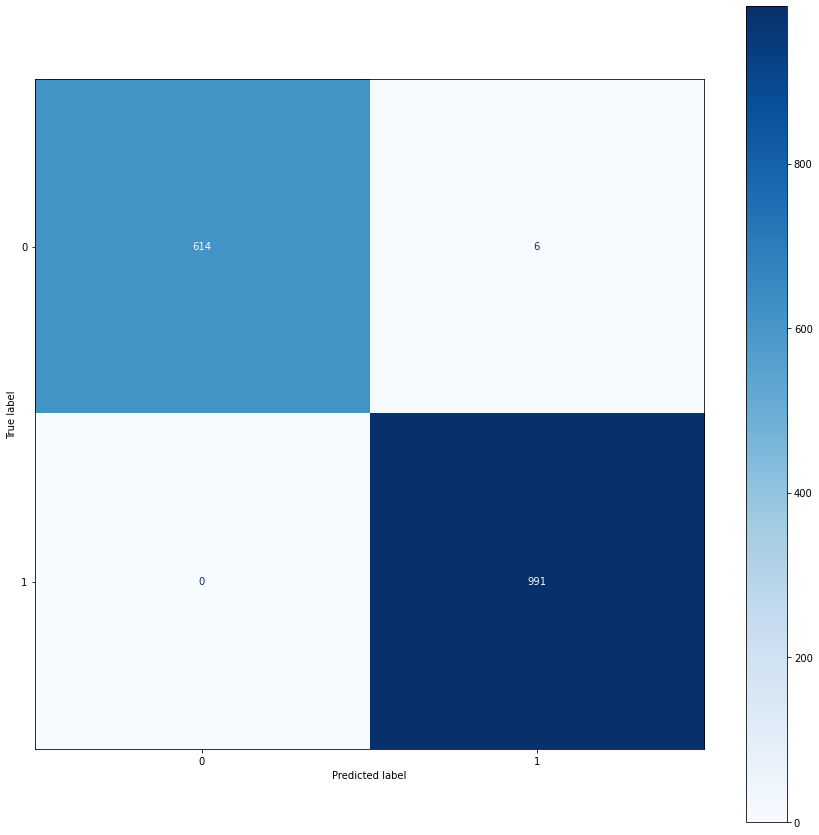


Classification Report

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       620
           1       0.99      1.00      1.00       991

    accuracy                           1.00      1611
   macro avg       1.00      1.00      1.00      1611
weighted avg       1.00      1.00      1.00      1611



In [ ]:
predecir(X_test,target_test_01,model_01)

51/51 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.9814
[0.39218106865882874, 0.9813780188560486]
(1611, 2) (1611, 2)

Confusion Matrix



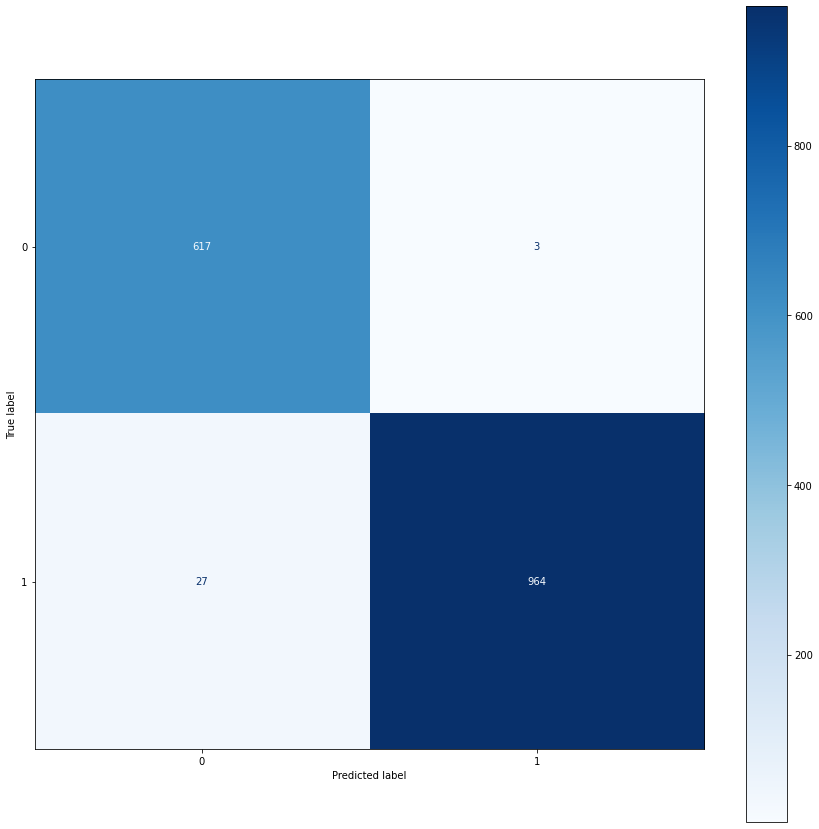


Classification Report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       620
           1       1.00      0.97      0.98       991

    accuracy                           0.98      1611
   macro avg       0.98      0.98      0.98      1611
weighted avg       0.98      0.98      0.98      1611



In [ ]:
predecir(X_test,target_test_03,model_03)

51/51 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.6151
[0.6928184032440186, 0.6151458621025085]
(1611, 2) (1611, 2)

Confusion Matrix



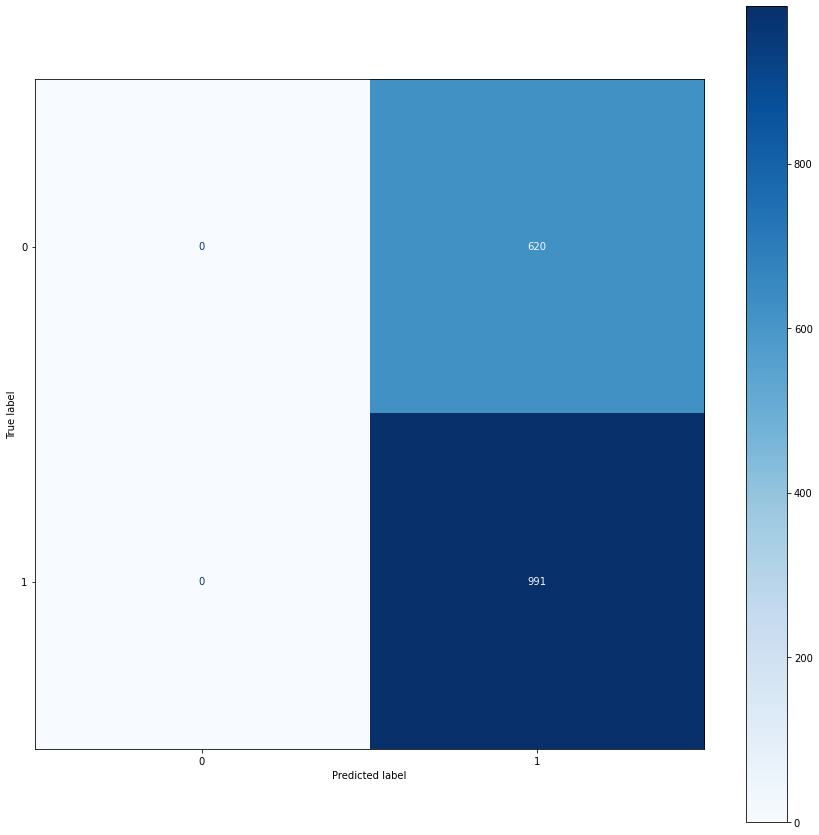


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       620
           1       0.62      1.00      0.76       991

    accuracy                           0.62      1611
   macro avg       0.31      0.50      0.38      1611
weighted avg       0.38      0.62      0.47      1611



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predecir(X_test,target_test_05,model_05)

51/51 [==============================] - 0s 2ms/step - loss: 0.7184 - accuracy: 0.3849
[0.7184339761734009, 0.38485413789749146]
(1611, 2) (1611, 2)

Confusion Matrix



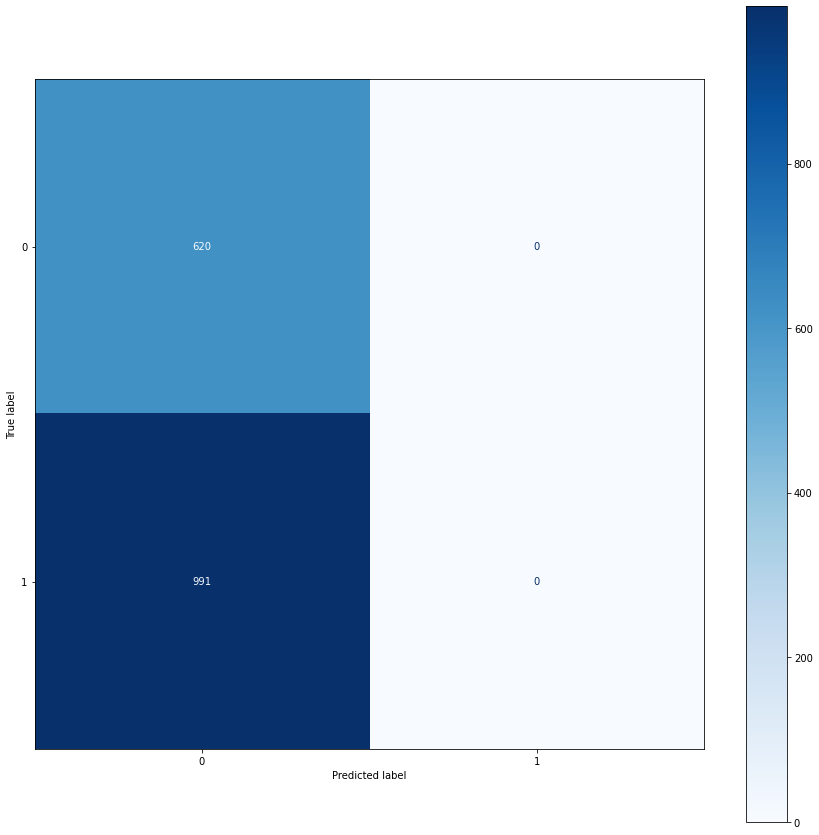


Classification Report

              precision    recall  f1-score   support

           0       0.38      1.00      0.56       620
           1       0.00      0.00      0.00       991

    accuracy                           0.38      1611
   macro avg       0.19      0.50      0.28      1611
weighted avg       0.15      0.38      0.21      1611



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predecir(X_test,target_test_07,model_07)

51/51 [==============================] - 0s 2ms/step - loss: 2.2433 - accuracy: 0.0137
[2.2432944774627686, 0.013656114228069782]
(1611, 2) (1611, 2)

Confusion Matrix



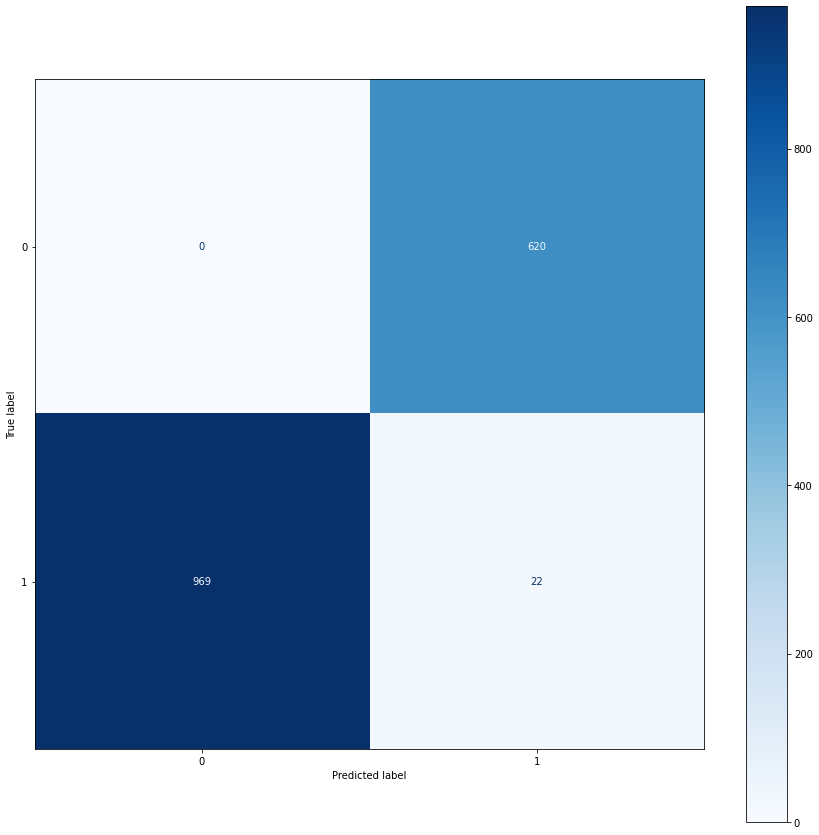


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       620
           1       0.03      0.02      0.03       991

    accuracy                           0.01      1611
   macro avg       0.02      0.01      0.01      1611
weighted avg       0.02      0.01      0.02      1611



In [ ]:
predecir(X_test,target_test_09,model_09)

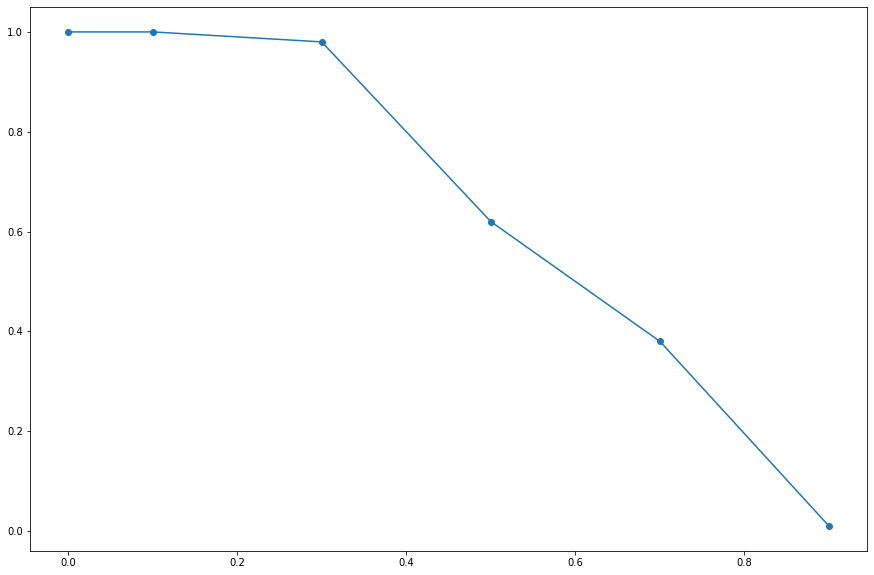

In [ ]:
import matplotlib.pyplot as plt
x = [0.0,0.1,0.3,0.5,0.7,0.9]
y = [1.00,1.00,0.98,0.62,0.38,0.01]

plt.figure(figsize=(15,10))
plt.scatter(x, y)
plt.plot(x, y)
plt.show()

## Dataset 2: Fetos


In [ ]:
data = pd.read_csv('fetal_health.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### Preprocesamiento

In [ ]:
data['fetal_health'].replace(1.0, 0, inplace=True)
data['fetal_health'].replace(2.0, 1, inplace=True)
data['fetal_health'].replace(3.0, 2, inplace=True)
data['fetal_health'].unique()

array([1., 0., 2.])

#### División de la data

In [ ]:
data['fetal_health'].value_counts()

0.0    1655
1.0     295
2.0     176
Name: fetal_health, dtype: int64

In [ ]:
y = data['fetal_health']
X = data.drop(['fetal_health'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1488, 21)
(638, 21)
(1488,)
(638,)


### Modelo

In [ ]:
model = Sequential()
model.add(Dense(50, input_shape=(21,), activation="relu"))
model.add(Dense(35,activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(3,activation="softmax"))
#0.1 , 0.001, 0.0001
opt = tf.keras.optimizers.Adam(0.001) #impacto en velocidad de convergencia y calidad del minimo (Descenso del gradiente(learning rate))
# Si el learning rate es muy grande, la optimización se hará a pasos grandes. Más chico, más sofisticado
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 50)                1100      
                                                                 
 dense_16 (Dense)            (None, 35)                1785      
                                                                 
 dense_17 (Dense)            (None, 25)                900       
                                                                 
 dense_18 (Dense)            (None, 10)                260       
                                                                 
 dense_19 (Dense)            (None, 3)                 33        
                                                                 
Total params: 4,078
Trainable params: 4,078
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0) #straify...

#estandarizacion
X_train_2 /= 255 
X_val /= 255
X_test /= 255

n_classes = 3
#las redes reciben one hots.....
target_train = to_categorical(y_train_2, n_classes)
target_val = to_categorical(y_val, n_classes)
target_test = to_categorical(y_test, n_classes)

print("Formas Targets: ", target_train.shape, target_val.shape, target_test.shape)

Formas Targets:  (1041, 3) (447, 3) (638, 3)


In [ ]:
y_val.value_counts()

0.0    345
1.0     68
2.0     34
Name: fetal_health, dtype: int64

In [ ]:
history = model.fit(X_train_2, target_train, batch_size=5, epochs=20, verbose=2, validation_data=(X_val, target_val))

Epoch 1/20
209/209 - 1s - loss: 0.6899 - accuracy: 0.7646 - val_loss: 0.6060 - val_accuracy: 0.7718 - 1s/epoch - 7ms/step
Epoch 2/20
209/209 - 0s - loss: 0.5363 - accuracy: 0.7906 - val_loss: 0.4954 - val_accuracy: 0.8031 - 455ms/epoch - 2ms/step
Epoch 3/20
209/209 - 0s - loss: 0.4432 - accuracy: 0.8329 - val_loss: 0.4394 - val_accuracy: 0.8009 - 458ms/epoch - 2ms/step
Epoch 4/20
209/209 - 0s - loss: 0.4152 - accuracy: 0.8415 - val_loss: 0.4207 - val_accuracy: 0.8121 - 498ms/epoch - 2ms/step
Epoch 5/20
209/209 - 1s - loss: 0.3950 - accuracy: 0.8405 - val_loss: 0.4353 - val_accuracy: 0.8143 - 501ms/epoch - 2ms/step
Epoch 6/20
209/209 - 1s - loss: 0.3877 - accuracy: 0.8444 - val_loss: 0.3812 - val_accuracy: 0.8412 - 518ms/epoch - 2ms/step
Epoch 7/20
209/209 - 0s - loss: 0.3728 - accuracy: 0.8473 - val_loss: 0.3740 - val_accuracy: 0.8345 - 455ms/epoch - 2ms/step
Epoch 8/20
209/209 - 0s - loss: 0.3667 - accuracy: 0.8501 - val_loss: 0.3642 - val_accuracy: 0.8479 - 430ms/epoch - 2ms/step
Epo

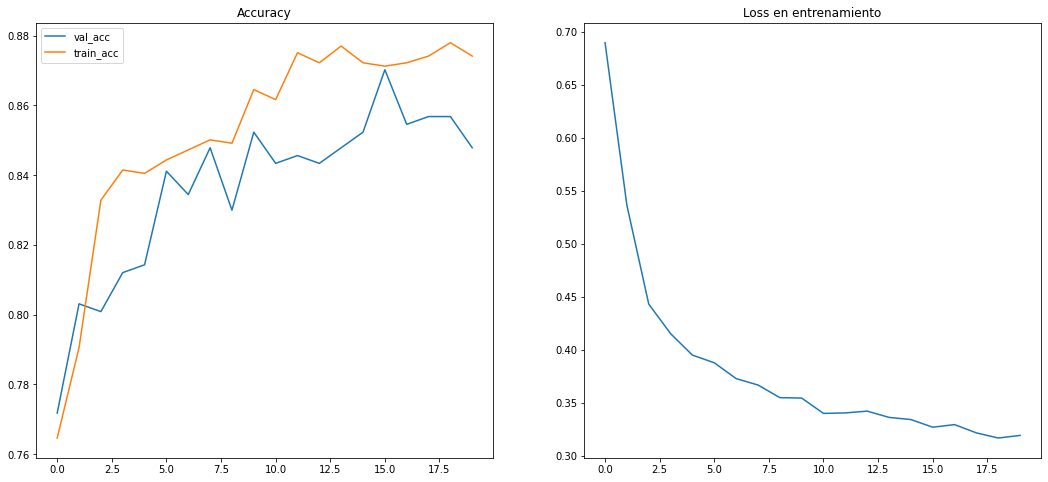

In [ ]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2, figsize=(18,8))
axis[0].plot(history.history['val_accuracy'], label='val_acc')
axis[0].plot(history.history['accuracy'], label='train_acc')
axis[0].set_title("Accuracy")
axis[0].legend()
axis[1].plot(history.history['loss'], label='loss')
axis[1].set_title("Loss en entrenamiento")
plt.show()

20/20 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8260
[0.4003645181655884, 0.8260188102722168]
(638, 3) (638, 3)

Confusion Matrix



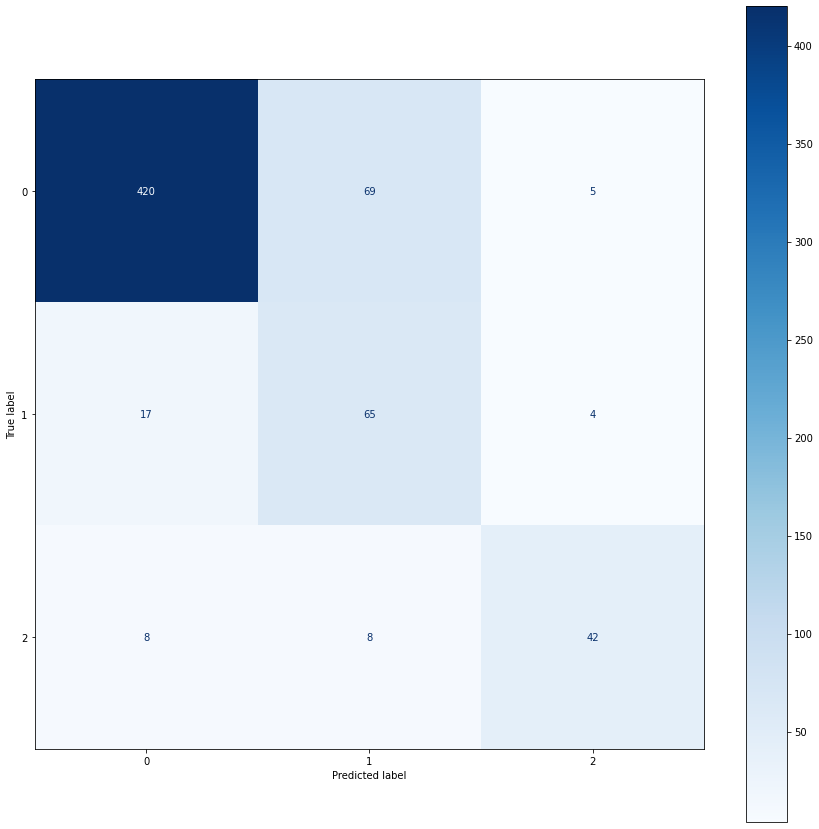


Classification Report

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       494
           1       0.46      0.76      0.57        86
           2       0.82      0.72      0.77        58

    accuracy                           0.83       638
   macro avg       0.74      0.78      0.75       638
weighted avg       0.87      0.83      0.84       638



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred = model.predict(X_test)
print(model.evaluate(X_test, target_test))
print(Y_pred.shape,target_test.shape)

# hay deshacer el one hot
y_pred_crisp = np.argmax(Y_pred, axis=1)
y_test_crisp = np.argmax(target_test, axis=1)

target_names = [str(i) for i in range(3)]

print("\nConfusion Matrix\n")
fig, ax = plt.subplots(figsize=(15, 15))
cm = confusion_matrix(y_test_crisp, y_pred_crisp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

print("\nClassification Report\n")

print(classification_report(y_test_crisp, y_pred_crisp, target_names=target_names))


### Swap

In [ ]:
import random

def swap(P, y):
  l = random.sample(y.index.values.tolist(), int(len(y)*P))
  for pos in l:
    r = random.randint(1, 2)
    if(y[pos] == 0):
      y[pos] = r
    elif(y[pos] == 1):
      if(r == 1):
        y[pos] = 0
      else:
        y[pos] = 2
    else:
      if(r == 1):
        y[pos] = 0
      else:
        y[pos] = 1
  return y

In [ ]:
y_01 = y_train.copy()
y_03 = y_train.copy()
y_05 = y_train.copy()
y_07 = y_train.copy()
y_09 = y_train.copy()

In [ ]:
y_01 = swap(0.1,y_01)
y_03 = swap(0.3,y_03)
y_05 = swap(0.5,y_05)
y_07 = swap(0.7,y_07)
y_09 = swap(0.9,y_09)

### Modelos

In [ ]:
def modelo(model):
  model.add(Dense(50, input_shape=(21,), activation="relu"))
  model.add(Dense(35,activation="relu"))
  model.add(Dense(25,activation="relu"))
  model.add(Dense(10,activation="relu"))
  model.add(Dense(3,activation="softmax"))
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)
  return model

In [ ]:
def preparacion(X_train,y_test,y_train):
  X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #straify...

  #estandarizacion
  X_train_2 /= 255 
  X_val /= 255

  n_classes = 3
  #las redes reciben one hots.....
  target_train = to_categorical(y_train_2, n_classes)
  target_val = to_categorical(y_val, n_classes)
  target_test = to_categorical(y_test, n_classes)
  return (target_train,target_val,target_test,X_val,X_train_2)


In [ ]:
model_01 = Sequential()
model_01 = modelo(model_01)
target_train_01,target_val_01,target_test_01,X_val_01,X_train_01 = preparacion(X_train,y_test,y_01)
history_01 = model_01.fit(X_train_01, target_train_01, batch_size=5, epochs=20, verbose=2, validation_data=(X_val_01, target_val_01))

Epoch 1/20
238/238 - 3s - loss: 0.5019 - accuracy: 0.7067 - val_loss: 0.4527 - val_accuracy: 0.7013 - 3s/epoch - 12ms/step
Epoch 2/20
238/238 - 1s - loss: 0.4237 - accuracy: 0.7210 - val_loss: 0.4199 - val_accuracy: 0.7148 - 1s/epoch - 5ms/step
Epoch 3/20
238/238 - 1s - loss: 0.4036 - accuracy: 0.7487 - val_loss: 0.4137 - val_accuracy: 0.7282 - 782ms/epoch - 3ms/step
Epoch 4/20
238/238 - 0s - loss: 0.3961 - accuracy: 0.7622 - val_loss: 0.4183 - val_accuracy: 0.7148 - 482ms/epoch - 2ms/step
Epoch 5/20
238/238 - 0s - loss: 0.3907 - accuracy: 0.7563 - val_loss: 0.4101 - val_accuracy: 0.7248 - 476ms/epoch - 2ms/step
Epoch 6/20
238/238 - 0s - loss: 0.3886 - accuracy: 0.7630 - val_loss: 0.4066 - val_accuracy: 0.7315 - 485ms/epoch - 2ms/step
Epoch 7/20
238/238 - 0s - loss: 0.3851 - accuracy: 0.7697 - val_loss: 0.4065 - val_accuracy: 0.7349 - 475ms/epoch - 2ms/step
Epoch 8/20
238/238 - 1s - loss: 0.3825 - accuracy: 0.7790 - val_loss: 0.4047 - val_accuracy: 0.7315 - 510ms/epoch - 2ms/step
Epoch

In [ ]:
model_03 = Sequential()
model_03 = modelo(model_03)
target_train_03,target_val_03,target_test_03,X_val_03,X_train_03 = preparacion(X_train,y_test,y_03)
history_03 = model_03.fit(X_train_03, target_train_03, batch_size=100, epochs=20, verbose=2, validation_data=(X_val_03, target_val_03))

Epoch 1/20
12/12 - 1s - loss: 0.6383 - accuracy: 0.5580 - val_loss: 0.5676 - val_accuracy: 0.6074 - 798ms/epoch - 66ms/step
Epoch 2/20
12/12 - 0s - loss: 0.5883 - accuracy: 0.5580 - val_loss: 0.5618 - val_accuracy: 0.6074 - 66ms/epoch - 5ms/step
Epoch 3/20
12/12 - 0s - loss: 0.5790 - accuracy: 0.5580 - val_loss: 0.5498 - val_accuracy: 0.6074 - 57ms/epoch - 5ms/step
Epoch 4/20
12/12 - 0s - loss: 0.5766 - accuracy: 0.5580 - val_loss: 0.5490 - val_accuracy: 0.6074 - 66ms/epoch - 6ms/step
Epoch 5/20
12/12 - 0s - loss: 0.5747 - accuracy: 0.5580 - val_loss: 0.5508 - val_accuracy: 0.6074 - 59ms/epoch - 5ms/step
Epoch 6/20
12/12 - 0s - loss: 0.5715 - accuracy: 0.5580 - val_loss: 0.5406 - val_accuracy: 0.6074 - 57ms/epoch - 5ms/step
Epoch 7/20
12/12 - 0s - loss: 0.5681 - accuracy: 0.5580 - val_loss: 0.5440 - val_accuracy: 0.6074 - 76ms/epoch - 6ms/step
Epoch 8/20
12/12 - 0s - loss: 0.5654 - accuracy: 0.5588 - val_loss: 0.5391 - val_accuracy: 0.6208 - 53ms/epoch - 4ms/step
Epoch 9/20
12/12 - 0s 

In [ ]:
model_05 = Sequential()
model_05 = modelo(model_05)
target_train_05,target_val_05,target_test_05,X_val_05,X_train_05 = preparacion(X_train,y_test,y_05)
history_05 = model_05.fit(X_train_05, target_train_05, batch_size=5, epochs=20, verbose=2, validation_data=(X_val_05, target_val_05))

Epoch 1/20
238/238 - 1s - loss: 0.6291 - accuracy: 0.4370 - val_loss: 0.6152 - val_accuracy: 0.4966 - 1s/epoch - 5ms/step
Epoch 2/20
238/238 - 1s - loss: 0.6238 - accuracy: 0.4437 - val_loss: 0.6078 - val_accuracy: 0.4966 - 519ms/epoch - 2ms/step
Epoch 3/20
238/238 - 1s - loss: 0.6227 - accuracy: 0.4437 - val_loss: 0.6102 - val_accuracy: 0.4966 - 574ms/epoch - 2ms/step
Epoch 4/20
238/238 - 1s - loss: 0.6219 - accuracy: 0.4437 - val_loss: 0.6094 - val_accuracy: 0.4966 - 569ms/epoch - 2ms/step
Epoch 5/20
238/238 - 1s - loss: 0.6216 - accuracy: 0.4437 - val_loss: 0.6054 - val_accuracy: 0.4966 - 566ms/epoch - 2ms/step
Epoch 6/20
238/238 - 0s - loss: 0.6188 - accuracy: 0.4445 - val_loss: 0.6037 - val_accuracy: 0.4966 - 477ms/epoch - 2ms/step
Epoch 7/20
238/238 - 0s - loss: 0.6197 - accuracy: 0.4496 - val_loss: 0.6038 - val_accuracy: 0.4966 - 478ms/epoch - 2ms/step
Epoch 8/20
238/238 - 1s - loss: 0.6193 - accuracy: 0.4445 - val_loss: 0.6047 - val_accuracy: 0.5000 - 567ms/epoch - 2ms/step
Epo

In [ ]:
model_07 = Sequential()
model_07 = modelo(model_07)
target_train_07,target_val_07,target_test_07,X_val_07,X_train_07 = preparacion(X_train,y_test,y_07)
history_07 = model_07.fit(X_train_07, target_train_07, batch_size=5, epochs=20, verbose=2, validation_data=(X_val_07, target_val_07))

Epoch 1/20
238/238 - 3s - loss: 0.6419 - accuracy: 0.3328 - val_loss: 0.6353 - val_accuracy: 0.3322 - 3s/epoch - 13ms/step
Epoch 2/20
238/238 - 1s - loss: 0.6368 - accuracy: 0.3235 - val_loss: 0.6351 - val_accuracy: 0.3322 - 1s/epoch - 5ms/step
Epoch 3/20
238/238 - 1s - loss: 0.6369 - accuracy: 0.3504 - val_loss: 0.6346 - val_accuracy: 0.3758 - 899ms/epoch - 4ms/step
Epoch 4/20
238/238 - 1s - loss: 0.6366 - accuracy: 0.3420 - val_loss: 0.6351 - val_accuracy: 0.3322 - 900ms/epoch - 4ms/step
Epoch 5/20
238/238 - 1s - loss: 0.6370 - accuracy: 0.3286 - val_loss: 0.6347 - val_accuracy: 0.3758 - 811ms/epoch - 3ms/step
Epoch 6/20
238/238 - 1s - loss: 0.6365 - accuracy: 0.3479 - val_loss: 0.6346 - val_accuracy: 0.3758 - 825ms/epoch - 3ms/step
Epoch 7/20
238/238 - 1s - loss: 0.6366 - accuracy: 0.3429 - val_loss: 0.6353 - val_accuracy: 0.3322 - 809ms/epoch - 3ms/step
Epoch 8/20
238/238 - 1s - loss: 0.6364 - accuracy: 0.3319 - val_loss: 0.6353 - val_accuracy: 0.3322 - 831ms/epoch - 3ms/step
Epoch

In [ ]:
model_09 = Sequential()
model_09 = modelo(model_09)
target_train_09,target_val_09,target_test_09,X_val_09,X_train_09 = preparacion(X_train,y_test,y_09)
history_09 = model_09.fit(X_train_09, target_train_09, batch_size=5, epochs=20, verbose=2, validation_data=(X_val_09, target_val_09))

Epoch 1/20
238/238 - 3s - loss: 0.6197 - accuracy: 0.3916 - val_loss: 0.6060 - val_accuracy: 0.3926 - 3s/epoch - 11ms/step
Epoch 2/20
238/238 - 1s - loss: 0.6137 - accuracy: 0.4050 - val_loss: 0.6079 - val_accuracy: 0.4228 - 1s/epoch - 6ms/step
Epoch 3/20
238/238 - 1s - loss: 0.6124 - accuracy: 0.4118 - val_loss: 0.6040 - val_accuracy: 0.4396 - 846ms/epoch - 4ms/step
Epoch 4/20
238/238 - 1s - loss: 0.6104 - accuracy: 0.4109 - val_loss: 0.5983 - val_accuracy: 0.4362 - 761ms/epoch - 3ms/step
Epoch 5/20
238/238 - 1s - loss: 0.6091 - accuracy: 0.3950 - val_loss: 0.5982 - val_accuracy: 0.4362 - 961ms/epoch - 4ms/step
Epoch 6/20
238/238 - 1s - loss: 0.6074 - accuracy: 0.4176 - val_loss: 0.5971 - val_accuracy: 0.4295 - 786ms/epoch - 3ms/step
Epoch 7/20
238/238 - 1s - loss: 0.6056 - accuracy: 0.4168 - val_loss: 0.5949 - val_accuracy: 0.4597 - 867ms/epoch - 4ms/step
Epoch 8/20
238/238 - 1s - loss: 0.6043 - accuracy: 0.4101 - val_loss: 0.5943 - val_accuracy: 0.4530 - 741ms/epoch - 3ms/step
Epoch

### Predecir

In [ ]:
def predecir(X_test,target_test,model):
  Y_pred = model.predict(X_test)
  print(model.evaluate(X_test, target_test))
  print(Y_pred.shape,target_test.shape)

  # hay deshacer el one hot
  y_pred_crisp = np.argmax(Y_pred, axis=1)
  y_test_crisp = np.argmax(target_test, axis=1)

  target_names = [str(i) for i in range(3)]

  print("\nConfusion Matrix\n")
  fig, ax = plt.subplots(figsize=(15, 15))
  cm = confusion_matrix(y_test_crisp, y_pred_crisp)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
  disp = disp.plot(ax=ax,cmap=plt.cm.Blues)
  plt.show()

  print("\nClassification Report\n")

  print(classification_report(y_test_crisp, y_pred_crisp, target_names=target_names))

20/20 [==============================] - 0s 5ms/step - loss: 0.2741 - accuracy: 0.8292
[0.2741408050060272, 0.8291535973548889]
(638, 3) (638, 3)

Confusion Matrix



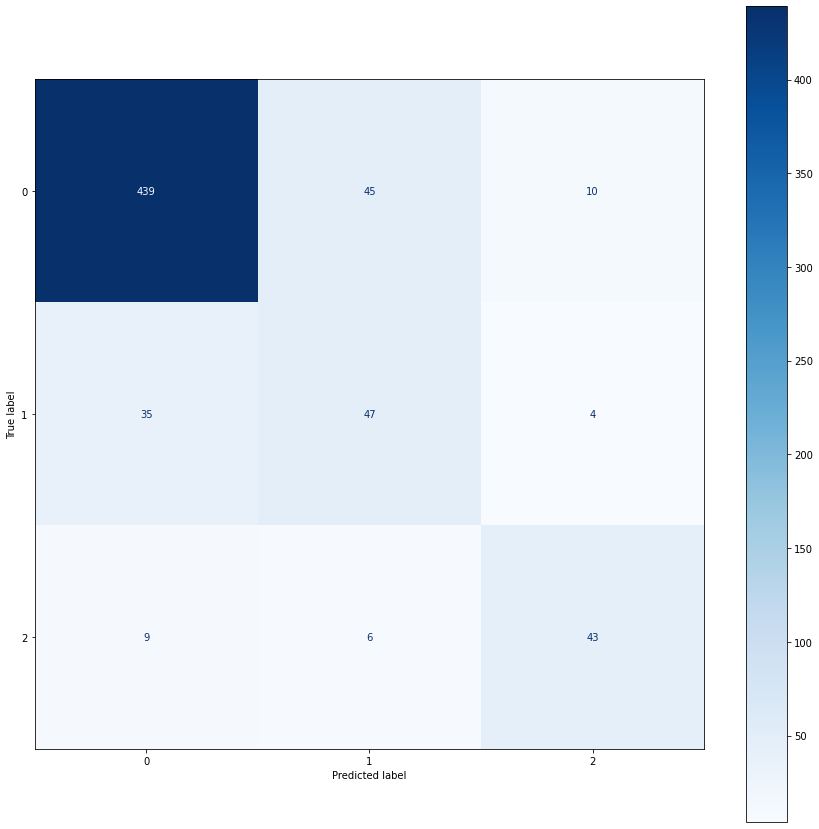


Classification Report

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       494
           1       0.48      0.55      0.51        86
           2       0.75      0.74      0.75        58

    accuracy                           0.83       638
   macro avg       0.71      0.73      0.72       638
weighted avg       0.84      0.83      0.83       638



In [ ]:
predecir(X_test,target_test_01,model_01)

20/20 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8213
[0.3964994549751282, 0.8213165998458862]
(638, 3) (638, 3)

Confusion Matrix



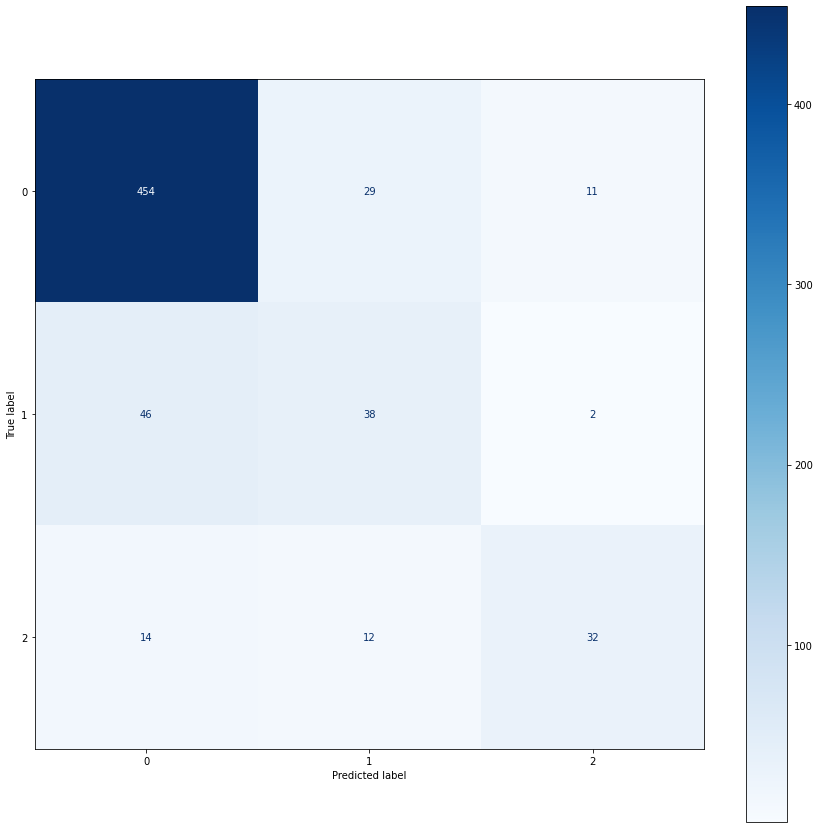


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       494
           1       0.48      0.44      0.46        86
           2       0.71      0.55      0.62        58

    accuracy                           0.82       638
   macro avg       0.69      0.64      0.66       638
weighted avg       0.81      0.82      0.82       638



In [ ]:
predecir(X_test,target_test_03,model_03)

20/20 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.8260
[0.5098375082015991, 0.8260188102722168]
(638, 3) (638, 3)

Confusion Matrix



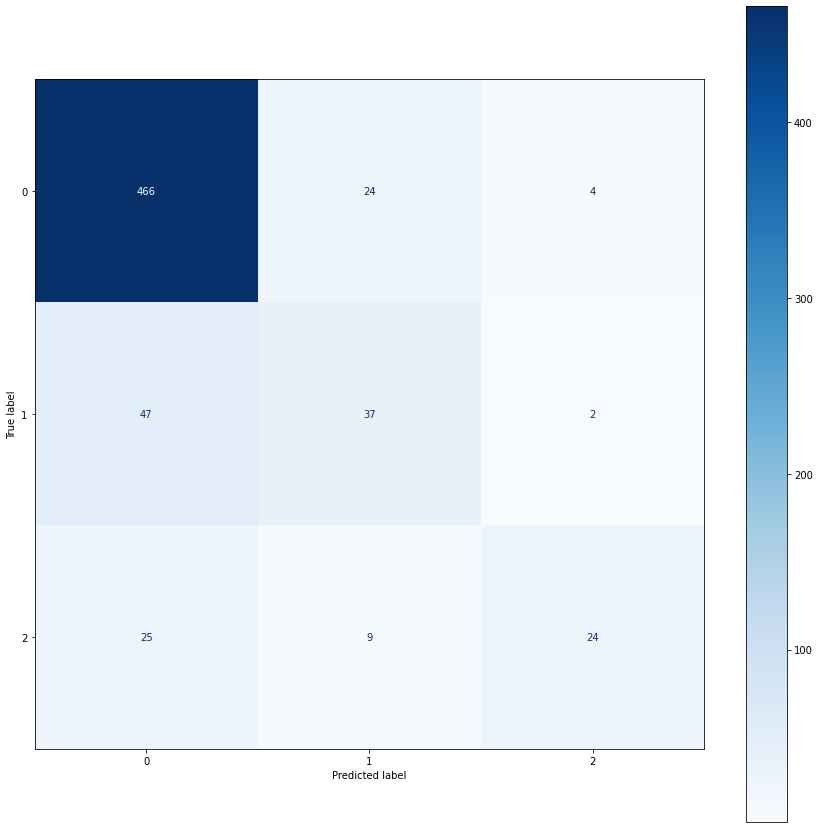


Classification Report

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       494
           1       0.53      0.43      0.47        86
           2       0.80      0.41      0.55        58

    accuracy                           0.83       638
   macro avg       0.73      0.60      0.64       638
weighted avg       0.81      0.83      0.81       638



In [ ]:
predecir(X_test,target_test_05,model_05)

20/20 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.4953
[0.6330925822257996, 0.4952978193759918]
(638, 3) (638, 3)

Confusion Matrix



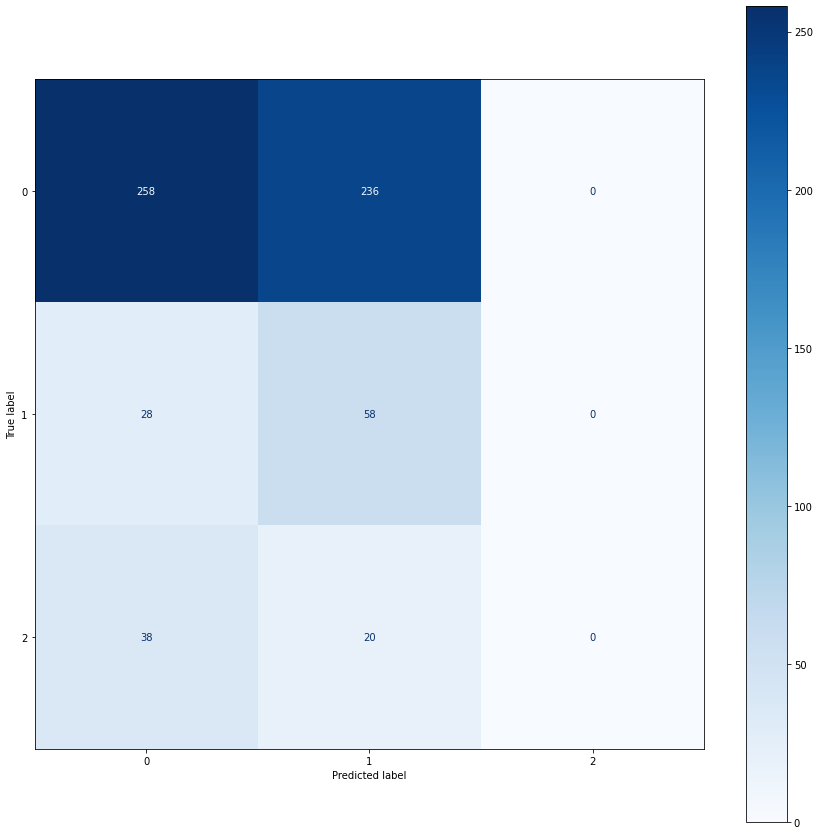


Classification Report

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       494
           1       0.18      0.67      0.29        86
           2       0.00      0.00      0.00        58

    accuracy                           0.50       638
   macro avg       0.33      0.40      0.31       638
weighted avg       0.64      0.50      0.53       638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predecir(X_test,target_test_07,model_07)

20/20 [==============================] - 0s 3ms/step - loss: 0.9109 - accuracy: 0.0580
[0.9108747243881226, 0.057993728667497635]
(638, 3) (638, 3)

Confusion Matrix



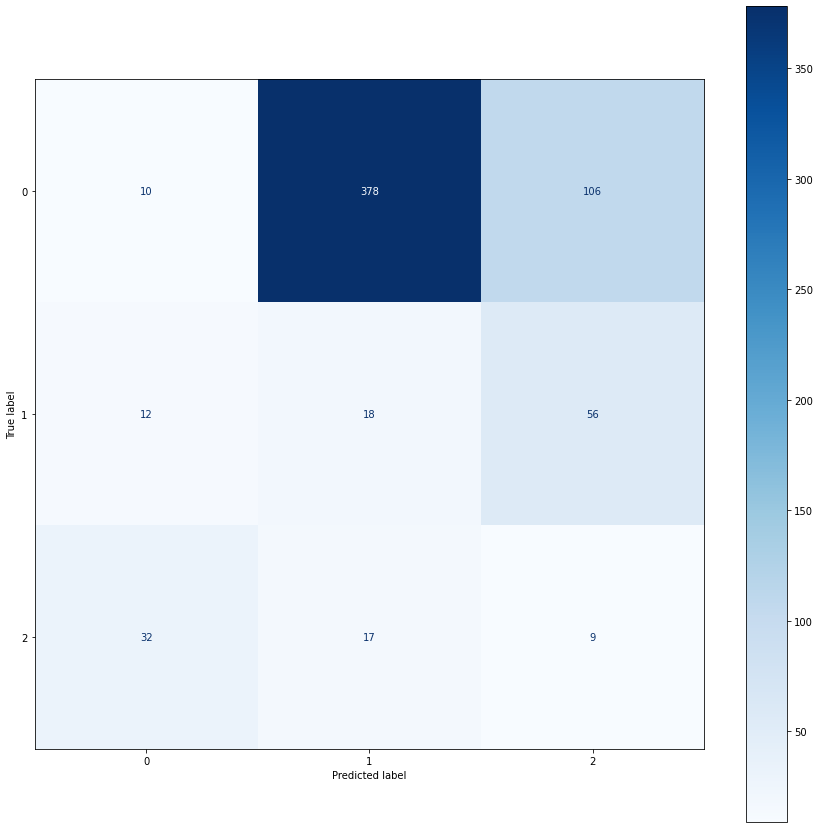


Classification Report

              precision    recall  f1-score   support

           0       0.19      0.02      0.04       494
           1       0.04      0.21      0.07        86
           2       0.05      0.16      0.08        58

    accuracy                           0.06       638
   macro avg       0.09      0.13      0.06       638
weighted avg       0.15      0.06      0.05       638



In [ ]:
predecir(X_test,target_test_09,model_09)

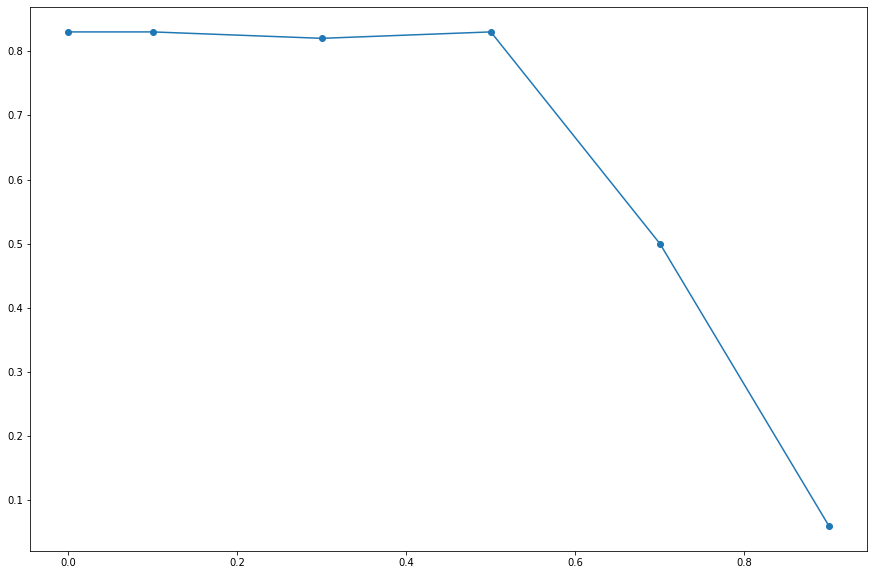

In [ ]:
import matplotlib.pyplot as plt
x = [0.0,0.1,0.3,0.5,0.7,0.9]
y = [0.83,0.83,0.82,0.83,0.5,0.06]

plt.figure(figsize=(15,10))
plt.scatter(x, y)
plt.plot(x, y)
plt.show()

# Parte II - Desafío Kaggle




<table align='left'>
<tr>
<td><img src='https://cdn.zmescience.com/wp-content/uploads/2020/07/recycling-1024x384.jpg' width='900'/> </td>
</tr>
</table>


Con el desarrollo del aprendizaje profundo en el campo de computer vision, hemos visto la posibilidad de utilizar la IA para clasificar automáticamente residuos. Tomar fotografías de la basura a través de cámaras, o incluso monitorearlas en tiempo real, para detectar los tipos de basura en las imágenes puede permitir que las máquinas clasifiquen la basura automáticamente y optimizar la gestión del reciclaje. Adicionalmente, en ciertos contexto puede ser relevante clasificar los residuos de manera progresiva, por ejemplo, discernir cuando un residuo es reutilizable puede ser más urgente que saber específicamente su origen.

En este desafío deben diseñar una red neuronal para clasificación de imágenes de residuos. La parte novedosa es que las clases están organizadas en un árbol o taxonomía, de modo se trata de un problema de *clasificación jerárquica*. El clasificador que diseñen debe predecir primero la clase más gruesa de la taxonomía (nivel bajo la raíz), luego una clase correspondiente al segundo nivel, y así sucesivamente hasta llegar a la clasificación más fina (hojas del árbol). Si el clasificador no está seguro de la clase que corresponde a un nivel, es válido detener el proceso de predicción antes de llegar al nivel más fino, pero eso se traducirá en una pérdida de desempeño.

Más detalles en: https://www.kaggle.com/competitions/deeplearning1usm/data


In [ ]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import keras
from skimage.io import imread
from tensorflow import keras
from tensorflow.keras import optimizers
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving codificacion.npy to codificacion.npy
Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [ ]:
codificacion = np.load ('codificacion.npy', allow_pickle=True)
codificacion

array({0: 'Reciclables', 1: 'Material desconocido o varios metales', 2: 'Articulos de cocina', 3: 'Potes de colación', 4: 'Plástico', 5: 'Bolsas de plástico', 6: 'Reciclabilidad indeterminada', 7: 'Colillas', 8: 'Maderas', 9: 'Palillos de dientes', 10: 'Macetas y platos rotos', 11: 'Otros palillos de basura\\Bambú', 12: 'Desperdicios de cocina\\Sobras', 13: 'Productos orgánicos', 14: 'Desechos animales', 15: 'Huesos grandes', 16: 'Desechos vegetales', 17: 'Cáscara de fruta', 18: 'Pulpa de fruta', 19: 'Residuos de té', 20: 'Raíces vegetales', 21: 'Cáscaras de huevo', 22: 'Espinas de pescado', 23: 'Articulos electronicos', 24: 'Banco de energía', 25: 'Vestimenta y telas', 26: 'Bolsos y mochilas', 27: 'Botellas', 28: 'Botellas cosméticas', 29: 'Juguetes de plástico', 30: 'Cuencos de plástico', 31: 'Perchas de plástico', 32: 'Papel', 33: 'Bolsas de papel exprés', 34: 'Cable de enchufe', 35: 'Ropa usada', 36: 'Metal', 37: 'Latas', 38: 'Almohadas', 39: 'Juguetes de peluche', 40: 'Botellas de

In [ ]:
data = pd.read_csv('Train.csv',index_col=0)
data

,name_img,label_codificado
0,img_9639.jpg,0 32 33
1,img_17504.jpg,0 1 27 49
2,img_6585.jpg,0 13 14 22
3,img_9375.jpg,0 4 31
4,img_4716.jpg,0 13 16 19
...,...,...
11836,img_1331.jpg,6 10
11837,img_11091.jpg,0 1 25 35
11838,img_3323.jpg,0 13 16 17
11839,img_17871.jpg,0 1 27 49


In [ ]:
test = pd.read_csv('Test.csv',index_col=0)
test

,name_img
0,img_821.jpg
1,img_1892.jpg
2,img_17597.jpg
3,img_16741.jpg
4,img_1350.jpg
...,...
2956,img_4038.jpg
2957,img_3359.jpg
2958,img_13864.jpg
2959,img_2868.jpg


In [ ]:
len(data['label_codificado'].unique())

40

## Pipeline 1: Eliminar jerarquización y crear modelo

In [ ]:
data_prepro = data.copy()
for i in data.index:
  valor = data_prepro['label_codificado'][i].split(' ')
  data_prepro['label_codificado'][i] = valor[-1]

In [ ]:
data_prepro

,name_img,label_codificado
0,img_9639.jpg,33
1,img_17504.jpg,49
2,img_6585.jpg,22
3,img_9375.jpg,31
4,img_4716.jpg,19
...,...,...
11836,img_1331.jpg,10
11837,img_11091.jpg,35
11838,img_3323.jpg,17
11839,img_17871.jpg,49


In [ ]:
data_prepro['label_codificado'].unique()

array(['33', '49', '22', '31', '19', '48', '18', '30', '26', '17', '41',
       '43', '46', '34', '55', '20', '47', '12', '35', '24', '38', '39',
       '37', '53', '11', '54', '42', '21', '50', '45', '27', '9', '10',
       '3', '15', '5', '28', '40', '29', '7'], dtype=object)

### Replace

In [ ]:
dic = {}
l = data_prepro['label_codificado'].unique()
for i in range(len(l)):
  dic[i] = l[i]
dic

{0: '33',
 1: '49',
 2: '22',
 3: '31',
 4: '19',
 5: '48',
 6: '18',
 7: '30',
 8: '26',
 9: '17',
 10: '41',
 11: '43',
 12: '46',
 13: '34',
 14: '55',
 15: '20',
 16: '47',
 17: '12',
 18: '35',
 19: '24',
 20: '38',
 21: '39',
 22: '37',
 23: '53',
 24: '11',
 25: '54',
 26: '42',
 27: '21',
 28: '50',
 29: '45',
 30: '27',
 31: '9',
 32: '10',
 33: '3',
 34: '15',
 35: '5',
 36: '28',
 37: '40',
 38: '29',
 39: '7'}

In [ ]:
for k,v in dic.items():
  data_prepro['label_codificado'].replace(v, k, inplace=True)
data_prepro['label_codificado'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

### Split

In [ ]:
y = data_prepro['label_codificado']
X = data_prepro.drop(['label_codificado'], axis=1)

In [ ]:
def define_model():
    model = Sequential()
    
    # Un patrón comun es un stack de 2 capas convolucionales seguidas de una capa de maxpooling
    model.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(150, 150,3))) # 32 es el numero de canales, (3,3) es el tamaño del filtro
    model.add(Conv2D(32, (3, 3), activation='relu',padding='same')) # padding mantiene el tamaño apropiado rellenando con 0's
    model.add(MaxPooling2D((2, 2), padding='same')) # pooling es necesario para controlar la dimensionalidad. Con tamaño (2,2) junta 4 pixeles en 1
                                                    # hay otros tipos de pooling, MaxPooling toma el pixel con el valor mas grande entre los 4
    model.add(Conv2D(16, (3, 3), activation='relu',padding='same'))
    model.add(Conv2D(16, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    
    model.add(Flatten()) # la matriz resultante de las capas convolucionales no es compatible con una capa densa. La 'aplanamos' primero.
    model.add(Dense(100, activation='relu')) # una pequeña capa para procesar un poco
    model.add(Dense(40, activation='softmax')) # capa que clasifica
    # compile model
    opt = SGD()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = define_model()

In [ ]:
def Split(X,y,input):
  if(input):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
    return (X_train_2, X_val, y_train_2, y_val, X_test, y_test)
  else:
    X_train_2, X_test, y_train_2, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return (X_train_2, X_test, y_train_2, y_test)
    

In [ ]:
#X_train_2, X_val, y_train_2, y_val, X_test, y_test = Split(X,y,1)
X_train_2, X_test, y_train_2, y_test = Split(X,y,0)

In [ ]:
train, test = train_test_split(data_prepro, test_size=0.2, random_state=0)

In [ ]:
data_dir = "/content/drive/MyDrive/Data Taller 1/train_data/img/"
test_dir = "/content/drive/MyDrive/Data Taller 1/test_data/img/"

In [ ]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.3,
        horizontal_flip=True)
#test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
        train,
        directory=data_dir,
        x_col = 'name_img',
        y_col = 'label_codificado',
        target_size=(150, 150),
        batch_size=32,
        shuffle=True,
        subset = "training",
        class_mode="categorical")


Found 6631 validated image filenames belonging to 40 classes.


In [ ]:
valid_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.3,
        horizontal_flip=True)
#test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_dataframe(
        train,
        directory=data_dir,
        x_col = 'name_img',
        y_col = 'label_codificado',
        target_size=(150, 150),
        batch_size=32,
        shuffle=True,
        subset = "validation",
        class_mode="categorical")


Found 2841 validated image filenames belonging to 40 classes.


In [ ]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
#test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
        test,
        directory=data_dir,
        x_col = 'name_img',
        y_col = 'label_codificado',
        target_size=(150, 150),
        batch_size=1,
        shuffle=False,
        class_mode=None)


Found 2369 validated image filenames.


In [ ]:
model.fit_generator(generator=train_generator,
                    steps_per_epoch=100,
                    validation_data=valid_generator,
                    validation_steps=30,
                    epochs=8
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/8
100/100 [==============================] - 731s 7s/step - loss: 3.6730 - accuracy: 0.0453 - val_loss: 3.6739 - val_accuracy: 0.0333
Epoch 2/8
100/100 [==============================] - 362s 4s/step - loss: 3.6579 - accuracy: 0.0554 - val_loss: 3.6792 - val_accuracy: 0.0333
Epoch 3/8
100/100 [==============================] - 215s 2s/step - loss: 3.6474 - accuracy: 0.0550 - val_loss: 3.6570 - val_accuracy: 0.0458
Epoch 4/8
100/100 [==============================] - 144s 1s/step - loss: 3.6095 - accuracy: 0.0586 - val_loss: 3.6051 - val_accuracy: 0.0510
Epoch 5/8
100/100 [==============================] - 95s 954ms/step - loss: 3.5405 - accuracy: 0.0794 - val_loss: 3.5181 - val_accuracy: 0.0771
Epoch 6/8
100/100 [==============================] - 75s 753ms/step - loss: 3.4793 - accuracy: 0.0888 - val_loss: 3.4702 - val_accuracy: 0.0792
Epoch 7/8
100/100 [==============================] - 65s 649ms/step - loss: 3.4143 - accuracy: 0.1071 - val_loss: 3.4303 - val_accuracy: 0.0812


In [ ]:
model.evaluate(test_generator)

2369/2369 [==============================] - 622s 262ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [ ]:
model.evaluate_generator(generator=valid_generator,
steps=30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[3.3938307762145996, 0.08749999850988388]

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=500,
verbose=1)

  1/500 [..............................] - ETA: 53s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


500/500 [==============================] - 145s 290ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

## Pipeline 2: Usar redes pre-entrenadas con jerarquía

In [ ]:
#import os
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np


### Jerarquía

In [ ]:
objeto = []
for i in data.index:
  valor = data['label_codificado'][i].split(' ')
  objeto.append(valor[0])

print(objeto)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '51', '51', '0', '0', '0', '6', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '51', '0', '0', '0', '0', '0', '6', '0', '51', '51', '0', '0', '0', '0', '0', '51', '0', '0', '0', '0', '0', '0', '51', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6', '0', '0', '0', '0', '0', '0', '0', '0', '6', '0', '0', '0', '0', '0', '6', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '51', '0', '0', '0', '51', '0', '0', '0', '0', '0', '6', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '51', '0', '0', '0', '0', '51', '0', '0', '6', '0', '0', '0', '0', '0', '51', '0', '6', '0', '0', '0', '51', '0', '0', '0', '6', '0', '0', '0', '0', '0', '

In [ ]:
def unique(list1):
  # initialize a null list
  unique_list = []
  # traverse for all elements
  for x in list1:
    # check if exists in unique_list or not
    if x not in unique_list:
      unique_list.append(x)
  # print list
  for x in unique_list:
    print(x)

unique(objeto)

0
51
6


In [ ]:
data_prepro = data.copy()
data_prepro['OBJETO'] = objeto
data_prepro

,name_img,label_codificado,OBJETO
0,img_9639.jpg,0 32 33,0
1,img_17504.jpg,0 1 27 49,0
2,img_6585.jpg,0 13 14 22,0
3,img_9375.jpg,0 4 31,0
4,img_4716.jpg,0 13 16 19,0
...,...,...,...
11836,img_1331.jpg,6 10,6
11837,img_11091.jpg,0 1 25 35,0
11838,img_3323.jpg,0 13 16 17,0
11839,img_17871.jpg,0 1 27 49,0


In [ ]:
dic = {0: 'Reciclables', 1: 'Material desconocido o varios metales', 2: 'Articulos de cocina', 4: 'Plastico', 6: 'Reciclabilidad indeterminada', 8: 'Maderas', 13: 'Productos organicos', 14: 'Desechos animales', 16: 'Desechos vegetales', 23: 'Articulos electronicos', 25: 'Vestimenta y telas', 27: 'Botellas', 32: 'Papel', 36: 'Metal', 44: 'Cárton', 51: 'No reciclables', 52: 'Residuos peligrosos'}
aux = {}
for key in dic:
    aux[dic[key].upper()]=np.nan

In [ ]:
data_prepro = pd.concat([data_prepro,pd.DataFrame(aux,index=[0])],axis=0)
data_prepro = data_prepro.dropna(axis=0,how='all')

In [ ]:
def fun(elem,llave):
    elem = list(map(int,elem.split(' ')))
    if llave in elem: return elem[1+elem.index(llave)]
    return np.nan

In [ ]:
for key in dic:
    data_prepro[dic[key].upper()] = data_prepro['label_codificado'].apply(fun,llave=key)
    data_prepro[dic[key].upper()] =  data_prepro[dic[key].upper()].astype('Int64')

In [ ]:
for col in data_prepro.columns:
  data_prepro[col] = data_prepro[col].astype('str')

data_prepro

,name_img,label_codificado,OBJETO,RECICLABLES,MATERIAL DESCONOCIDO O VARIOS METALES,ARTICULOS DE COCINA,PLASTICO,RECICLABILIDAD INDETERMINADA,MADERAS,PRODUCTOS ORGANICOS,DESECHOS ANIMALES,DESECHOS VEGETALES,ARTICULOS ELECTRONICOS,VESTIMENTA Y TELAS,BOTELLAS,PAPEL,METAL,CÁRTON,NO RECICLABLES,RESIDUOS PELIGROSOS
0,img_9639.jpg,0 32 33,0,32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,33,<NA>,<NA>,<NA>,<NA>
1,img_17504.jpg,0 1 27 49,0,1,27,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,49,<NA>,<NA>,<NA>,<NA>,<NA>
2,img_6585.jpg,0 13 14 22,0,13,<NA>,<NA>,<NA>,<NA>,<NA>,14,22,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,img_9375.jpg,0 4 31,0,4,<NA>,<NA>,31,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,img_4716.jpg,0 13 16 19,0,13,<NA>,<NA>,<NA>,<NA>,<NA>,16,<NA>,19,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836,img_1331.jpg,6 10,6,<NA>,<NA>,<NA>,<NA>,10,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
11837,img_11091.jpg,0 1 25 35,0,1,25,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,35,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
11838,img_3323.jpg,0 13 16 17,0,13,<NA>,<NA>,<NA>,<NA>,<NA>,16,<NA>,17,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
11839,img_17871.jpg,0 1 27 49,0,1,27,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,49,<NA>,<NA>,<NA>,<NA>,<NA>


In [ ]:
for col in data_prepro.columns:
  print(col)
  print(data_prepro[col].unique())

name_img
['img_9639.jpg' 'img_17504.jpg' 'img_6585.jpg' ... 'img_3323.jpg'
 'img_17871.jpg' 'img_6364.jpg']
label_codificado
['0 32 33' '0 1 27 49' '0 13 14 22' '0 4 31' '0 13 16 19' '0 1 2 48'
 '0 13 16 18' '0 4 30' '0 1 25 26' '0 13 16 17' '0 1 2 41' '0 8 43'
 '0 1 27 46' '0 1 23 34' '51 52 55' '0 13 16 20' '0 36 47' '6 12'
 '0 1 25 35' '0 1 23 24' '0 1 25 38' '0 1 25 39' '0 36 37' '51 52 53'
 '0 8 11' '51 52 54' '0 1 25 42' '0 13 14 21' '0 1 27 50' '0 44 45'
 '0 1 27 27' '0 8 9' '6 10' '0 1 2 3' '0 13 14 15' '0 4 5' '0 1 27 28'
 '0 1 27 40' '0 4 29' '6 7']
OBJETO
['0' '51' '6']
RECICLABLES
['32' '1' '13' '4' '8' '<NA>' '36' '44']
MATERIAL DESCONOCIDO O VARIOS METALES
['<NA>' '27' '2' '25' '23']
ARTICULOS DE COCINA
['<NA>' '48' '41' '3']
PLASTICO
['<NA>' '31' '30' '5' '29']
RECICLABILIDAD INDETERMINADA
['<NA>' '12' '10' '7']
MADERAS
['<NA>' '43' '11' '9']
PRODUCTOS ORGANICOS
['<NA>' '14' '16']
DESECHOS ANIMALES
['<NA>' '22' '21' '15']
DESECHOS VEGETALES
['<NA>' '19' '18' '17' '20']
A

In [ ]:
data_prepro.columns

Index(['name_img', 'label_codificado', 'OBJETO', 'RECICLABLES',
       'MATERIAL DESCONOCIDO O VARIOS METALES', 'ARTICULOS DE COCINA',
       'PLASTICO', 'RECICLABILIDAD INDETERMINADA', 'MADERAS',
       'PRODUCTOS ORGANICOS', 'DESECHOS ANIMALES', 'DESECHOS VEGETALES',
       'ARTICULOS ELECTRONICOS', 'VESTIMENTA Y TELAS', 'BOTELLAS', 'PAPEL',
       'METAL', 'CÁRTON', 'NO RECICLABLES', 'RESIDUOS PELIGROSOS'],
      dtype='object')

In [ ]:
dataj1 = data_prepro[['name_img','OBJETO']]
dataj2 = data_prepro[['name_img','RECICLABLES']]
dataj3 = data_prepro[['name_img','NO RECICLABLES']]
dataj4 = data_prepro[['name_img','RECICLABILIDAD INDETERMINADA']]
dataj5 = data_prepro[['name_img','MATERIAL DESCONOCIDO O VARIOS METALES']]
dataj6 = data_prepro[['name_img','METAL']]
dataj7 = data_prepro[['name_img','MADERAS']]
dataj8 = data_prepro[['name_img','PLASTICO']]
dataj9 = data_prepro[['name_img','CÁRTON']]
dataj10 = data_prepro[['name_img','PRODUCTOS ORGANICOS']]
dataj11 = data_prepro[['name_img','PAPEL']]
dataj12 = data_prepro[['name_img','RESIDUOS PELIGROSOS']]
dataj13 = data_prepro[['name_img','VESTIMENTA Y TELAS']]
dataj14 = data_prepro[['name_img','BOTELLAS']]
dataj15 = data_prepro[['name_img','ARTICULOS DE COCINA']]
dataj16 = data_prepro[['name_img','ARTICULOS ELECTRONICOS']]
dataj17 = data_prepro[['name_img','DESECHOS VEGETALES']]
dataj18 = data_prepro[['name_img','DESECHOS ANIMALES']]

### VGG16

![picture](https://miro.medium.com/max/980/1*vczqmHklozzgLpZxKAZEjw.jpeg)

VGG16 is a convolutional neural network trained on a subset of the ImageNet dataset, a collection of over 14 million images belonging to 22,000 categories. K. Simonyan and A. Zisserman proposed this model in the 2015 paper, Very Deep Convolutional Networks for Large-Scale Image Recognition.

In the 2014 ImageNet Classification Challenge, VGG16 achieved a 92.7% classification accuracy. But more importantly, it has been trained on millions of images.

### Funciones

In [ ]:
data_dir = "/content/drive/MyDrive/Data Taller 1/train_data/img"
test_dir = "/content/drive/MyDrive/Data Taller 1/test_data/img"
modelo_dir = "/content/drive/MyDrive/Data Taller 1/Modelos"

In [ ]:
BATCH_SIZE = 32

In [ ]:
def datagen(data_dir,train,label):
  BATCH_SIZE = 32
  train_datagen = keras.preprocessing.image.ImageDataGenerator(
          rescale=1./255,
          shear_range=0.2,
          zoom_range=0.2,
          validation_split=0.3,
          preprocessing_function=preprocess_input,
          horizontal_flip=True)

  train_generator = train_datagen.flow_from_dataframe(
          train,
          directory=data_dir,
          x_col = 'name_img',
          y_col = label,
          target_size=(224, 224),
          batch_size=BATCH_SIZE,
          shuffle=True,
          subset = "training",
          class_mode="categorical")

  valid_generator = train_datagen.flow_from_dataframe(
          train,
          directory=data_dir,
          x_col = 'name_img',
          y_col = label,
          target_size=(224, 224),
          batch_size=BATCH_SIZE,
          shuffle=True,
          subset = "validation",
          class_mode="categorical")
  
  return (train_generator,valid_generator)


In [ ]:
def testgen(data_dir,test,label):
  test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
  test_generator = test_datagen.flow_from_dataframe(
          test,
          directory=data_dir,
          x_col = 'name_img',
          #y_col = label,
          target_size=(224, 224),
          batch_size=1,
          shuffle=False,
          class_mode=None)
  return test_generator


In [ ]:
def create_model(input_shape, n_classes, capas, optimizer='rmsprop', fine_tune=0):

    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)

    conv_base = keras.Model(inputs=conv_base.inputs, outputs = conv_base.layers[capas].output)
    
    
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [ ]:
def accuracy(train_generator,true_classes,vgg_pred_classes):
  for label,valor in train_generator.class_indices.items():
    true_classes = true_classes.replace(label, str(valor))
  true_classes = list(map(int,true_classes))
  vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
  print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

In [ ]:
def modelo(capas,n_classes):
  input_shape = (224, 224, 3)
  optim_1 = Adam(learning_rate=0.001)
  return create_model(input_shape, n_classes, capas, optim_1, fine_tune=0)

### Objeto

In [ ]:
#trainj1, testj1 = train_test_split(dataj1, test_size=0.2, random_state=0)
trainj1 = dataj1
testj1 = test
label = 'OBJETO'
train_generator,valid_generator = datagen(data_dir,trainj1,label)

Found 8289 validated image filenames belonging to 3 classes.
Found 3552 validated image filenames belonging to 3 classes.


In [ ]:
#test_generator = testgen(data_dir,testj1,label)
test_generator = testgen(test_dir,testj1,label)

Found 2961 validated image filenames.


In [ ]:
capas = -13
n_classes=3
vgg_model_v1 = modelo(capas,n_classes)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
#n_steps = train_generator.samples // BATCH_SIZE #103
n_steps = 20
#n_val_steps = valid_generator.samples // BATCH_SIZE #44
n_val_steps = 10
#n_epochs = 50
n_epochs = 7
vgg_model_v1.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=valid_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,)


Epoch 1/7
20/20 [==============================] - 238s 12s/step - loss: 1009.2941 - accuracy: 0.7422 - val_loss: 305.6185 - val_accuracy: 0.8500
Epoch 2/7
20/20 [==============================] - 243s 12s/step - loss: 284.8695 - accuracy: 0.7125 - val_loss: 200.4183 - val_accuracy: 0.8906
Epoch 3/7
20/20 [==============================] - 197s 10s/step - loss: 163.1587 - accuracy: 0.7937 - val_loss: 34.2669 - val_accuracy: 0.8594
Epoch 4/7
20/20 [==============================] - 185s 10s/step - loss: 53.7651 - accuracy: 0.7159 - val_loss: 29.5516 - val_accuracy: 0.8250
Epoch 5/7
20/20 [==============================] - 178s 9s/step - loss: 17.5688 - accuracy: 0.6422 - val_loss: 1.0890 - val_accuracy: 0.8281
Epoch 6/7
20/20 [==============================] - 148s 8s/step - loss: 1.0189 - accuracy: 0.8547 - val_loss: 1.1006 - val_accuracy: 0.8469
Epoch 7/7
20/20 [==============================] - 138s 7s/step - loss: 1.1243 - accuracy: 0.8250 - val_loss: 1.0432 - val_accuracy: 0.8562


In [ ]:
modelo_objeto = modelo_dir + '/model_objeto.h5'
vgg_model_v1 = keras.models.load_model(modelo_objeto)

In [ ]:
vgg_model_v1.save('model_objeto.h5')

In [ ]:
pred=vgg_model_v1.predict(test_generator)
vgg_pred_classes = np.argmax(pred, axis=1)

In [ ]:
vgg_pred_classes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_pred = test.copy()
test_pred['label_codificado'] = vgg_pred_classes
test_pred

,name_img,label_codificado
0,img_821.jpg,0
1,img_1892.jpg,0
2,img_17597.jpg,0
3,img_16741.jpg,0
4,img_1350.jpg,0
...,...,...
2956,img_4038.jpg,0
2957,img_3359.jpg,0
2958,img_13864.jpg,0
2959,img_2868.jpg,0


In [ ]:
for label,valor in train_generator.class_indices.items():
  l = label
  v = valor
  test_pred['label_codificado'] = test_pred['label_codificado'].replace(v, l)

In [ ]:
test_pred.label_codificado.unique()

array(['0', '51', '6'], dtype=object)

### Reciclable

In [ ]:
dataj2 = dataj2.replace('<NA>', np.nan)
dataj2 = dataj2.dropna(how='any')

In [ ]:
dataj2

,name_img,RECICLABLES
0,img_9639.jpg,32
1,img_17504.jpg,1
2,img_6585.jpg,13
3,img_9375.jpg,4
4,img_4716.jpg,13
...,...,...
11835,img_13931.jpg,1
11837,img_11091.jpg,1
11838,img_3323.jpg,13
11839,img_17871.jpg,1


In [ ]:
test_pred_0 = test_pred[test_pred['label_codificado'] == '0']
test_pred_0

,name_img,label_codificado
0,img_821.jpg,0
1,img_1892.jpg,0
2,img_17597.jpg,0
3,img_16741.jpg,0
4,img_1350.jpg,0
...,...,...
2956,img_4038.jpg,0
2957,img_3359.jpg,0
2958,img_13864.jpg,0
2959,img_2868.jpg,0


In [ ]:
#trainj2, testj2 = train_test_split(dataj2, test_size=0.2, random_state=0)
trainj2 = dataj2
testj2 = test_pred_0
label = 'RECICLABLES'
train_generator,valid_generator = datagen(data_dir,trainj2,label)

Found 7052 validated image filenames belonging to 7 classes.
Found 3021 validated image filenames belonging to 7 classes.


In [ ]:
test_generator = testgen(test_dir,testj2,label)

Found 2953 validated image filenames.


In [ ]:
capas = -9
n_classes = 7
vgg_model_v2 = modelo(capas,n_classes)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
#n_steps = train_generator.samples // BATCH_SIZE #103
n_steps = 15
#n_val_steps = valid_generator.samples // BATCH_SIZE #44
n_val_steps = 10
#n_epochs = 50
n_epochs = 8
vgg_history = vgg_model_v2.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=valid_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)


Epoch 1/8
15/15 [==============================] - 213s 14s/step - loss: 1319.5344 - accuracy: 0.3562 - val_loss: 372.0015 - val_accuracy: 0.1844
Epoch 2/8
15/15 [==============================] - 186s 13s/step - loss: 307.0895 - accuracy: 0.4563 - val_loss: 91.5952 - val_accuracy: 0.4437
Epoch 3/8
15/15 [==============================] - 172s 12s/step - loss: 107.1120 - accuracy: 0.4042 - val_loss: 38.0840 - val_accuracy: 0.5250
Epoch 4/8
15/15 [==============================] - 163s 11s/step - loss: 17.6529 - accuracy: 0.3979 - val_loss: 2.0054 - val_accuracy: 0.5188
Epoch 5/8
15/15 [==============================] - 166s 11s/step - loss: 2.0808 - accuracy: 0.5167 - val_loss: 1.9256 - val_accuracy: 0.4875
Epoch 6/8
15/15 [==============================] - 130s 9s/step - loss: 1.9223 - accuracy: 0.5250 - val_loss: 1.9096 - val_accuracy: 0.4781
Epoch 7/8
15/15 [==============================] - 127s 9s/step - loss: 1.9082 - accuracy: 0.4958 - val_loss: 1.9277 - val_accuracy: 0.4750
Epo

In [ ]:
modelo_objeto = modelo_dir + '/model_reciclable.h5'
vgg_model_v2 = keras.models.load_model(modelo_objeto)

In [ ]:
vgg_model_v2.save('model_reciclable.h5')

In [ ]:
pred=vgg_model_v2.predict(test_generator)
vgg_pred_classes = np.argmax(pred, axis=1)

In [ ]:
test_pred_0['label_codificado'].unique()

array(['0'], dtype=object)

In [ ]:
test_pred_0['aux'] = vgg_pred_classes
test_pred_0['aux'] = test_pred_0['aux'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for label,valor in train_generator.class_indices.items():
  l = label
  v = str(valor)
  test_pred_0['aux'] = test_pred_0['aux'].replace(v, l)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test_pred_0['label_codificado'] = test_pred_0['label_codificado'].str.cat(test_pred_0['aux'],sep=' ')
test_pred_0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name_img,label_codificado,aux
0,img_821.jpg,0 13,13
1,img_1892.jpg,0 13,13
2,img_17597.jpg,0 13,13
3,img_16741.jpg,0 13,13
4,img_1350.jpg,0 13,13
...,...,...,...
2956,img_4038.jpg,0 13,13
2957,img_3359.jpg,0 13,13
2958,img_13864.jpg,0 13,13
2959,img_2868.jpg,0 13,13


In [ ]:
test_pred_0 = test_pred_0.drop(columns=['aux'])
test_pred_0

,name_img,label_codificado
0,img_821.jpg,0 13
1,img_1892.jpg,0 13
2,img_17597.jpg,0 13
3,img_16741.jpg,0 13
4,img_1350.jpg,0 13
...,...,...
2956,img_4038.jpg,0 13
2957,img_3359.jpg,0 13
2958,img_13864.jpg,0 13
2959,img_2868.jpg,0 13


### No Reciclable

In [ ]:
dataj3 = dataj3.replace('<NA>', np.nan)
dataj3 = dataj3.dropna(how='any')

In [ ]:
test_pred_51 = test_pred[test_pred['label_codificado'] == '51']
test_pred_51

,name_img,label_codificado
267,img_13379.jpg,51
430,img_19673.jpg,51
547,img_71.jpg,51
1605,img_18745.jpg,51
2329,img_19134.jpg,51
2781,img_9726.jpg,51
2934,img_18549.jpg,51


In [ ]:
test_pred_51['aux'] = test_pred_51['label_codificado']
test_pred_51['aux'] = test_pred_51['aux'].replace('51', str(52))
test_pred_51

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name_img,label_codificado,aux
267,img_13379.jpg,51,52
430,img_19673.jpg,51,52
547,img_71.jpg,51,52
1605,img_18745.jpg,51,52
2329,img_19134.jpg,51,52
2781,img_9726.jpg,51,52
2934,img_18549.jpg,51,52


In [ ]:
test_pred_51['label_codificado'] = test_pred_51['label_codificado'].str.cat(test_pred_51['aux'],sep=' ')
test_pred_51

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name_img,label_codificado,aux
267,img_13379.jpg,51 52,52
430,img_19673.jpg,51 52,52
547,img_71.jpg,51 52,52
1605,img_18745.jpg,51 52,52
2329,img_19134.jpg,51 52,52
2781,img_9726.jpg,51 52,52
2934,img_18549.jpg,51 52,52


In [ ]:
test_pred_51 = test_pred_51.drop(columns=['aux'])
test_pred_51

,name_img,label_codificado
267,img_13379.jpg,51 52
430,img_19673.jpg,51 52
547,img_71.jpg,51 52
1605,img_18745.jpg,51 52
2329,img_19134.jpg,51 52
2781,img_9726.jpg,51 52
2934,img_18549.jpg,51 52


### Reciclabilidad indeterminada

In [ ]:
dataj4 = dataj4.replace('<NA>', np.nan)
dataj4 = dataj4.dropna(how='any')
dataj4

,name_img,RECICLABILIDAD INDETERMINADA
22,img_2642.jpg,12
40,img_2611.jpg,12
69,img_2653.jpg,12
78,img_1517.jpg,10
84,img_1371.jpg,10
...,...,...
11789,img_1342.jpg,10
11790,img_2592.jpg,12
11802,img_1588.jpg,10
11804,img_2676.jpg,12


In [ ]:
test_pred_6 = test_pred[test_pred['label_codificado'] == '6']
test_pred_6

,name_img,label_codificado
1260,img_10124.jpg,6


In [ ]:
#trainj4, testj4 = train_test_split(dataj4, test_size=0.2, random_state=0)
trainj4 = dataj4
testj4 = test_pred_6
label = 'RECICLABILIDAD INDETERMINADA'
train_generator,valid_generator = datagen(data_dir,trainj4,label)

Found 594 validated image filenames belonging to 3 classes.
Found 254 validated image filenames belonging to 3 classes.


In [ ]:
test_generator = testgen(test_dir,testj4,label)

Found 1 validated image filenames.


In [ ]:
capas = -9
n_classes = 3
vgg_model_v2 = modelo(capas,n_classes)

In [ ]:
#n_steps = train_generator.samples // BATCH_SIZE #103
n_steps = 8
#n_val_steps = valid_generator.samples // BATCH_SIZE #44
n_val_steps = 5
#n_epochs = 50
n_epochs = 5
vgg_history = vgg_model_v2.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=valid_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/5
8/8 [==============================] - 105s 14s/step - loss: 972.5701 - accuracy: 0.4180 - val_loss: 467.9029 - val_accuracy: 0.4125
Epoch 2/5
8/8 [==============================] - 40s 5s/step - loss: 518.9952 - accuracy: 0.5124 - val_loss: 179.8327 - val_accuracy: 0.5813
Epoch 3/5
8/8 [==============================] - 23s 3s/step - loss: 204.0516 - accuracy: 0.6157 - val_loss: 59.7129 - val_accuracy: 0.7188
Epoch 4/5
8/8 [==============================] - 15s 2s/step - loss: 149.0092 - accuracy: 0.6016 - val_loss: 80.4045 - val_accuracy: 0.6750
Epoch 5/5
8/8 [==============================] - 14s 2s/step - loss: 99.9854 - accuracy: 0.7266 - val_loss: 44.7770 - val_accuracy: 0.7750


In [ ]:
modelo_objeto = modelo_dir + '/model_recicla_ind.h5'
vgg_model_v2 = keras.models.load_model(modelo_objeto)

In [ ]:
vgg_model_v2.save('model_recicla_ind.h5')

In [ ]:
pred=vgg_model_v2.predict(test_generator)
vgg_pred_classes = np.argmax(pred, axis=1)

In [ ]:
test_pred_6['label_codificado'].unique()

array(['6'], dtype=object)

In [ ]:
test_pred_6['aux'] = vgg_pred_classes
test_pred_6['aux'] = test_pred_6['aux'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for label,valor in train_generator.class_indices.items():
  l = label
  v = str(valor)
  test_pred_6['aux'] = test_pred_6['aux'].replace(v, l)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test_pred_6['label_codificado'] = test_pred_6['label_codificado'].str.cat(test_pred_6['aux'],sep=' ')
test_pred_6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name_img,label_codificado,aux
1260,img_10124.jpg,6 7,7


In [ ]:
test_pred_6 = test_pred_6.drop(columns=['aux'])
test_pred_6

,name_img,label_codificado
1260,img_10124.jpg,6 7


### Material desconocido o varios metales

In [ ]:
dataj5 = dataj5.replace('<NA>', np.nan)
dataj5 = dataj5.dropna(how='any')
dataj5

,name_img,MATERIAL DESCONOCIDO O VARIOS METALES
1,img_17504.jpg,27
5,img_17353.jpg,2
9,img_7733.jpg,25
11,img_13754.jpg,2
14,img_15828.jpg,27
...,...,...
11827,img_10362.jpg,23
11830,img_11192.jpg,25
11835,img_13931.jpg,2
11837,img_11091.jpg,25


In [ ]:
test_pred_0['label_codificado'].unique()

array(['0 13', '0 4', '0 32', '0 8', '0 44', '0 36'], dtype=object)

#### No encontró ninguno :(

In [ ]:
test_pred_1 = test_pred_0[test_pred_0['label_codificado'] == '0 1']
test_pred_1

,name_img,label_codificado


In [ ]:
#trainj5, testj5 = train_test_split(dataj5, test_size=0.2, random_state=0)
trainj5 = dataj5
testj5 = test_pred_1
label = 'MATERIAL DESCONOCIDO O VARIOS METALES'
train_generator,valid_generator = datagen(data_dir,trainj5,label)

In [ ]:
test_generator = testgen(test_dir,testj5,label)

In [ ]:
capas = -5
n_classes = 5
vgg_model_v3 = modelo(capas,n_classes)

In [ ]:
#n_steps = train_generator.samples // BATCH_SIZE #103
n_steps = 12
#n_val_steps = valid_generator.samples // BATCH_SIZE #44
n_val_steps = 8
#n_epochs = 50
n_epochs = 8
vgg_history = vgg_model_v3.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=valid_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

In [ ]:
vgg_model_v3.save('model_material_desconocido.h5')

In [ ]:
pred=vgg_model_v3.predict(test_generator)
vgg_pred_classes = np.argmax(pred, axis=1)

In [ ]:
test_pred_1['label_codificado'].unique()

In [ ]:
test_pred_1['aux'] = vgg_pred_classes
test_pred_1['aux'] = test_pred_1['aux'].astype('str')

In [ ]:
for label,valor in train_generator.class_indices.items():
  l = label
  v = str(valor)
  test_pred_1['aux'] = test_pred_1['aux'].replace(v, l)

In [ ]:
test_pred_1['label_codificado'] = test_pred_1['label_codificado'].str.cat(test_pred_1['aux'],sep=' ')
test_pred_1

In [ ]:
test_pred_1 = test_pred_1.drop(columns=['aux'])
test_pred_1

### Metal

In [ ]:
dataj6 = dataj6.replace('<NA>', np.nan)
dataj6 = dataj6.dropna(how='any')
dataj6

,name_img,METAL
21,img_16747.jpg,47
37,img_11356.jpg,37
86,img_16523.jpg,47
93,img_16590.jpg,47
105,img_16527.jpg,47
...,...,...
11740,img_11296.jpg,37
11751,img_11468.jpg,37
11752,img_16602.jpg,47
11807,img_16772.jpg,47


In [ ]:
test_pred_36 = test_pred_0[test_pred_0['label_codificado'] == '0 36']
test_pred_36

,name_img,label_codificado
1186,img_1987.jpg,0 36
1385,img_2009.jpg,0 36
1950,img_2031.jpg,0 36
2459,img_1221.jpg,0 36
2548,img_1262.jpg,0 36
2724,img_2164.jpg,0 36
2950,img_1973.jpg,0 36


In [ ]:
trainj6 = dataj6
testj6 = test_pred_36
label = 'METAL'
train_generator,valid_generator = datagen(data_dir,trainj6,label)

Found 354 validated image filenames belonging to 2 classes.
Found 151 validated image filenames belonging to 2 classes.


In [ ]:
test_generator = testgen(test_dir,testj6,label)

Found 7 validated image filenames.


In [ ]:
capas = -5
n_classes = 2
vgg_model_v3 = modelo(capas,n_classes)

In [ ]:
#n_steps = train_generator.samples // BATCH_SIZE #103
n_steps = 8
#n_val_steps = valid_generator.samples // BATCH_SIZE #44
n_val_steps = 4
#n_epochs = 50
n_epochs = 4
vgg_history = vgg_model_v3.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=valid_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/4
8/8 [==============================] - 53s 7s/step - loss: 56.4231 - accuracy: 0.5625 - val_loss: 18.6476 - val_accuracy: 0.5078
Epoch 2/4
8/8 [==============================] - 17s 2s/step - loss: 19.1715 - accuracy: 0.6406 - val_loss: 19.4309 - val_accuracy: 0.5859
Epoch 3/4
8/8 [==============================] - 9s 1s/step - loss: 14.7693 - accuracy: 0.6593 - val_loss: 10.2730 - val_accuracy: 0.6328
Epoch 4/4
8/8 [==============================] - 7s 960ms/step - loss: 7.7065 - accuracy: 0.7478 - val_loss: 10.2823 - val_accuracy: 0.6328


In [ ]:
vgg_model_v3.save('model_metal.h5')

In [ ]:
pred=vgg_model_v3.predict(test_generator)
vgg_pred_classes = np.argmax(pred, axis=1)

In [ ]:
test_pred_36['label_codificado'].unique()

array(['0 36'], dtype=object)

In [ ]:
test_pred_36['aux'] = vgg_pred_classes
test_pred_36['aux'] = test_pred_36['aux'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for label,valor in train_generator.class_indices.items():
  l = label
  v = str(valor)
  test_pred_36['aux'] = test_pred_36['aux'].replace(v, l)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test_pred_36['label_codificado'] = test_pred_36['label_codificado'].str.cat(test_pred_36['aux'],sep=' ')
test_pred_36

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name_img,label_codificado,aux
1186,img_1987.jpg,0 36 37,37
1385,img_2009.jpg,0 36 37,37
1950,img_2031.jpg,0 36 47,47
2459,img_1221.jpg,0 36 37,37
2548,img_1262.jpg,0 36 37,37
2724,img_2164.jpg,0 36 37,37
2950,img_1973.jpg,0 36 37,37


In [ ]:
test_pred_36 = test_pred_36.drop(columns=['aux'])
test_pred_36

,name_img,label_codificado
1186,img_1987.jpg,0 36 37
1385,img_2009.jpg,0 36 37
1950,img_2031.jpg,0 36 47
2459,img_1221.jpg,0 36 37
2548,img_1262.jpg,0 36 37
2724,img_2164.jpg,0 36 37
2950,img_1973.jpg,0 36 37


### Maderas

In [ ]:
dataj7 = dataj7.replace('<NA>', np.nan)
dataj7 = dataj7.dropna(how='any')
dataj7

,name_img,MADERAS
12,img_14556.jpg,43
38,img_14957.jpg,43
46,img_1950.jpg,11
48,img_1868.jpg,11
60,img_2166.jpg,11
...,...,...
11763,img_1284.jpg,9
11773,img_1225.jpg,9
11780,img_14489.jpg,43
11829,img_14804.jpg,43


In [ ]:
test_pred_8 = test_pred_0[test_pred_0['label_codificado'] == '0 8']
test_pred_8

,name_img,label_codificado
129,img_2014.jpg,0 8
197,img_1874.jpg,0 8
315,img_2024.jpg,0 8
319,img_2086.jpg,0 8
648,img_1839.jpg,0 8
759,img_1882.jpg,0 8
851,img_1248.jpg,0 8
1123,img_1928.jpg,0 8
1283,img_1826.jpg,0 8
1325,img_2020.jpg,0 8


In [ ]:
trainj7 = dataj7
testj7 = test_pred_8
label = 'MADERAS'
train_generator,valid_generator = datagen(data_dir,trainj7,label)

Found 443 validated image filenames belonging to 3 classes.
Found 189 validated image filenames belonging to 3 classes.


In [ ]:
test_generator = testgen(test_dir,testj7,label)

Found 26 validated image filenames.


In [ ]:
capas = -5
n_classes = 3
vgg_model_v3 = modelo(capas,n_classes)

In [ ]:
#n_steps = train_generator.samples // BATCH_SIZE #103
n_steps = 10
#n_val_steps = valid_generator.samples // BATCH_SIZE #44
n_val_steps = 6
#n_epochs = 50
n_epochs = 6
vgg_history = vgg_model_v3.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=valid_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/6
10/10 [==============================] - 60s 6s/step - loss: 33.7427 - accuracy: 0.5524 - val_loss: 13.8527 - val_accuracy: 0.5873
Epoch 2/6
10/10 [==============================] - 19s 2s/step - loss: 10.0298 - accuracy: 0.7429 - val_loss: 9.0818 - val_accuracy: 0.6825
Epoch 3/6
10/10 [==============================] - 13s 1s/step - loss: 5.9913 - accuracy: 0.8190 - val_loss: 5.2116 - val_accuracy: 0.8254
Epoch 4/6
10/10 [==============================] - 11s 1s/step - loss: 4.6355 - accuracy: 0.8531 - val_loss: 3.2557 - val_accuracy: 0.8942
Epoch 5/6
10/10 [==============================] - 11s 1s/step - loss: 1.2480 - accuracy: 0.9048 - val_loss: 2.3918 - val_accuracy: 0.8677
Epoch 6/6
10/10 [==============================] - 11s 1s/step - loss: 0.8319 - accuracy: 0.9344 - val_loss: 1.7210 - val_accuracy: 0.8836


In [ ]:
vgg_model_v3.save('model_madera.h5')

In [ ]:
pred=vgg_model_v3.predict(test_generator)
vgg_pred_classes = np.argmax(pred, axis=1)

In [ ]:
test_pred_8['label_codificado'].unique()

array(['0 8'], dtype=object)

In [ ]:
test_pred_8['aux'] = vgg_pred_classes
test_pred_8['aux'] = test_pred_8['aux'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for label,valor in train_generator.class_indices.items():
  l = label
  v = str(valor)
  test_pred_8['aux'] = test_pred_8['aux'].replace(v, l)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test_pred_8['label_codificado'] = test_pred_8['label_codificado'].str.cat(test_pred_8['aux'],sep=' ')
test_pred_8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name_img,label_codificado,aux
129,img_2014.jpg,0 8 11,11
197,img_1874.jpg,0 8 11,11
315,img_2024.jpg,0 8 11,11
319,img_2086.jpg,0 8 11,11
648,img_1839.jpg,0 8 11,11
759,img_1882.jpg,0 8 11,11
851,img_1248.jpg,0 8 11,11
1123,img_1928.jpg,0 8 11,11
1283,img_1826.jpg,0 8 11,11
1325,img_2020.jpg,0 8 11,11


In [ ]:
test_pred_8 = test_pred_8.drop(columns=['aux'])
test_pred_8

,name_img,label_codificado
129,img_2014.jpg,0 8 11
197,img_1874.jpg,0 8 11
315,img_2024.jpg,0 8 11
319,img_2086.jpg,0 8 11
648,img_1839.jpg,0 8 11
759,img_1882.jpg,0 8 11
851,img_1248.jpg,0 8 11
1123,img_1928.jpg,0 8 11
1283,img_1826.jpg,0 8 11
1325,img_2020.jpg,0 8 11


### Plastico

In [ ]:
dataj8 = dataj8.replace('<NA>', np.nan)
dataj8 = dataj8.dropna(how='any')
dataj8

,name_img,PLASTICO
3,img_9375.jpg,31
7,img_9494.jpg,31
8,img_8759.jpg,30
13,img_8783.jpg,30
24,img_9246.jpg,31
...,...,...
11781,img_9401.jpg,31
11792,img_409.jpg,5
11798,img_577.jpg,5
11821,img_8739.jpg,30


In [ ]:
test_pred_4 = test_pred_0[test_pred_0['label_codificado'] == '0 4']
test_pred_4

,name_img,label_codificado
10,img_2903.jpg,0 4
21,img_6534.jpg,0 4
45,img_10638.jpg,0 4
114,img_4395.jpg,0 4
287,img_5261.jpg,0 4
293,img_4243.jpg,0 4
333,img_5092.jpg,0 4
417,img_1110.jpg,0 4
418,img_4379.jpg,0 4
474,img_1046.jpg,0 4


In [ ]:
trainj8 = dataj8
testj8 = test_pred_4
label = 'PLASTICO'
train_generator,valid_generator = datagen(data_dir,trainj8,label)

Found 758 validated image filenames belonging to 4 classes.
Found 324 validated image filenames belonging to 4 classes.


In [ ]:
test_generator = testgen(test_dir,testj8,label)

Found 50 validated image filenames.


In [ ]:
capas = -5
n_classes = 4
vgg_model_v3 = modelo(capas,n_classes)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
#n_steps = train_generator.samples // BATCH_SIZE #103
n_steps = 12
#n_val_steps = valid_generator.samples // BATCH_SIZE #44
n_val_steps = 8
#n_epochs = 50
n_epochs = 8
vgg_history = vgg_model_v3.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=valid_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/8
12/12 [==============================] - 185s 16s/step - loss: 65.1630 - accuracy: 0.3503 - val_loss: 16.9065 - val_accuracy: 0.6016
Epoch 2/8
12/12 [==============================] - 62s 5s/step - loss: 15.2974 - accuracy: 0.6172 - val_loss: 5.7401 - val_accuracy: 0.7852
Epoch 3/8
12/12 [==============================] - 33s 3s/step - loss: 4.7743 - accuracy: 0.8125 - val_loss: 2.4831 - val_accuracy: 0.8477
Epoch 4/8
12/12 [==============================] - 17s 1s/step - loss: 2.2885 - accuracy: 0.8610 - val_loss: 2.0637 - val_accuracy: 0.8516
Epoch 5/8
12/12 [==============================] - 18s 2s/step - loss: 1.3488 - accuracy: 0.8529 - val_loss: 1.6115 - val_accuracy: 0.8594
Epoch 6/8
12/12 [==============================] - 14s 1s/step - loss: 0.7268 - accuracy: 0.9011 - val_loss: 1.5490 - val_accuracy: 0.8438
Epoch 7/8
12/12 [==============================] - 13s 1s/step - loss: 0.6204 - accuracy: 0.9064 - val_loss: 0.6557 - val_accuracy: 0.9258
Epoch 8/8
12/12 [=====

In [ ]:
vgg_model_v3.save('model_plastico.h5')

In [ ]:
pred=vgg_model_v3.predict(test_generator)
vgg_pred_classes = np.argmax(pred, axis=1)

In [ ]:
test_pred_4['label_codificado'].unique()

array(['0 4'], dtype=object)

In [ ]:
test_pred_4['aux'] = vgg_pred_classes
test_pred_4['aux'] = test_pred_4['aux'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for label,valor in train_generator.class_indices.items():
  l = label
  v = str(valor)
  test_pred_4['aux'] = test_pred_4['aux'].replace(v, l)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test_pred_4['label_codificado'] = test_pred_4['label_codificado'].str.cat(test_pred_4['aux'],sep=' ')
test_pred_4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name_img,label_codificado,aux
10,img_2903.jpg,0 4 29,29
21,img_6534.jpg,0 4 29,29
45,img_10638.jpg,0 4 29,29
114,img_4395.jpg,0 4 31,31
287,img_5261.jpg,0 4 29,29
293,img_4243.jpg,0 4 29,29
333,img_5092.jpg,0 4 29,29
417,img_1110.jpg,0 4 29,29
418,img_4379.jpg,0 4 29,29
474,img_1046.jpg,0 4 31,31


In [ ]:
test_pred_4 = test_pred_4.drop(columns=['aux'])
test_pred_4

,name_img,label_codificado
10,img_2903.jpg,0 4 29
21,img_6534.jpg,0 4 29
45,img_10638.jpg,0 4 29
114,img_4395.jpg,0 4 31
287,img_5261.jpg,0 4 29
293,img_4243.jpg,0 4 29
333,img_5092.jpg,0 4 29
417,img_1110.jpg,0 4 29
418,img_4379.jpg,0 4 29
474,img_1046.jpg,0 4 31


### Carton

In [ ]:
dataj9 = dataj9.replace('<NA>', np.nan)
dataj9 = dataj9.dropna(how='any')

In [ ]:
test_pred_44 = test_pred_0[test_pred_0['label_codificado'] == '0 44']
test_pred_44

,name_img,label_codificado
1039,img_5943.jpg,0 44
1776,img_14802.jpg,0 44
2662,img_11221.jpg,0 44
2912,img_11161.jpg,0 44
2941,img_14594.jpg,0 44


In [ ]:
test_pred_44['aux'] = test_pred_44['label_codificado']
test_pred_44['aux'] = test_pred_44['aux'].replace('0 44', '45')
test_pred_44

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name_img,label_codificado,aux
1039,img_5943.jpg,0 44,45
1776,img_14802.jpg,0 44,45
2662,img_11221.jpg,0 44,45
2912,img_11161.jpg,0 44,45
2941,img_14594.jpg,0 44,45


In [ ]:
test_pred_44['label_codificado'] = test_pred_44['label_codificado'].str.cat(test_pred_44['aux'],sep=' ')
test_pred_44

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name_img,label_codificado,aux
1039,img_5943.jpg,0 44 45,45
1776,img_14802.jpg,0 44 45,45
2662,img_11221.jpg,0 44 45,45
2912,img_11161.jpg,0 44 45,45
2941,img_14594.jpg,0 44 45,45


In [ ]:
test_pred_44 = test_pred_44.drop(columns=['aux'])
test_pred_44

,name_img,label_codificado
1039,img_5943.jpg,0 44 45
1776,img_14802.jpg,0 44 45
2662,img_11221.jpg,0 44 45
2912,img_11161.jpg,0 44 45
2941,img_14594.jpg,0 44 45


### Productos organicos

In [ ]:
dataj10 = dataj10.replace('<NA>', np.nan)
dataj10 = dataj10.dropna(how='any')
dataj10

,name_img,PRODUCTOS ORGANICOS
2,img_6585.jpg,14
4,img_4716.jpg,16
6,img_4167.jpg,16
10,img_3570.jpg,16
19,img_4985.jpg,16
...,...,...
11823,img_4988.jpg,16
11832,img_5810.jpg,14
11833,img_3297.jpg,16
11838,img_3323.jpg,16


In [ ]:
test_pred_13 = test_pred_0[test_pred_0['label_codificado'] == '0 13']
test_pred_13

,name_img,label_codificado
0,img_821.jpg,0 13
1,img_1892.jpg,0 13
2,img_17597.jpg,0 13
3,img_16741.jpg,0 13
4,img_1350.jpg,0 13
...,...,...
2956,img_4038.jpg,0 13
2957,img_3359.jpg,0 13
2958,img_13864.jpg,0 13
2959,img_2868.jpg,0 13


In [ ]:
trainj10 = dataj10
testj10 = test_pred_13
label = 'PRODUCTOS ORGANICOS'
train_generator,valid_generator = datagen(data_dir,trainj10,label)

Found 1677 validated image filenames belonging to 2 classes.
Found 718 validated image filenames belonging to 2 classes.


In [ ]:
test_generator = testgen(test_dir,testj10,label)

Found 2861 validated image filenames.


In [ ]:
capas = -5
n_classes = 2
vgg_model_v3 = modelo(capas,n_classes)

In [ ]:
#n_steps = train_generator.samples // BATCH_SIZE #103
n_steps = 6
#n_val_steps = valid_generator.samples // BATCH_SIZE #44
n_val_steps = 4
#n_epochs = 50
n_epochs = 4
vgg_history = vgg_model_v3.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=valid_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/4
6/6 [==============================] - 100s 18s/step - loss: 110.6272 - accuracy: 0.5052 - val_loss: 124.9965 - val_accuracy: 0.5156
Epoch 2/4
6/6 [==============================] - 78s 14s/step - loss: 42.7437 - accuracy: 0.5677 - val_loss: 33.4298 - val_accuracy: 0.6250
Epoch 3/4
6/6 [==============================] - 68s 12s/step - loss: 26.2600 - accuracy: 0.5625 - val_loss: 9.6698 - val_accuracy: 0.6562
Epoch 4/4
6/6 [==============================] - 55s 10s/step - loss: 13.8208 - accuracy: 0.6615 - val_loss: 7.6932 - val_accuracy: 0.6016


In [ ]:
vgg_model_v3.save('model_organico.h5')

In [ ]:
pred=vgg_model_v3.predict(test_generator)
vgg_pred_classes = np.argmax(pred, axis=1)

In [ ]:
test_pred_13['label_codificado'].unique()

array(['0 13'], dtype=object)

In [ ]:
test_pred_13['aux'] = vgg_pred_classes
test_pred_13['aux'] = test_pred_13['aux'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for label,valor in train_generator.class_indices.items():
  l = label
  v = str(valor)
  test_pred_13['aux'] = test_pred_13['aux'].replace(v, l)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test_pred_13['label_codificado'] = test_pred_13['label_codificado'].str.cat(test_pred_13['aux'],sep=' ')
test_pred_13

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name_img,label_codificado,aux
0,img_821.jpg,0 13 14,14
1,img_1892.jpg,0 13 14,14
2,img_17597.jpg,0 13 14,14
3,img_16741.jpg,0 13 14,14
4,img_1350.jpg,0 13 14,14
...,...,...,...
2956,img_4038.jpg,0 13 14,14
2957,img_3359.jpg,0 13 14,14
2958,img_13864.jpg,0 13 14,14
2959,img_2868.jpg,0 13 14,14


In [ ]:
test_pred_13 = test_pred_13.drop(columns=['aux'])
test_pred_13

,name_img,label_codificado
0,img_821.jpg,0 13 14
1,img_1892.jpg,0 13 14
2,img_17597.jpg,0 13 14
3,img_16741.jpg,0 13 14
4,img_1350.jpg,0 13 14
...,...,...
2956,img_4038.jpg,0 13 14
2957,img_3359.jpg,0 13 14
2958,img_13864.jpg,0 13 14
2959,img_2868.jpg,0 13 14


### Papel

In [ ]:
dataj11 = dataj11.replace('<NA>', np.nan)
dataj11 = dataj11.dropna(how='any')

In [ ]:
test_pred_32 = test_pred_0[test_pred_0['label_codificado'] == '0 32']
test_pred_32

,name_img,label_codificado
92,img_9662.jpg,0 32
238,img_9706.jpg,0 32
552,img_9698.jpg,0 32
1240,img_9710.jpg,0 32


In [ ]:
test_pred_32['aux'] = test_pred_32['label_codificado']
test_pred_32['aux'] = test_pred_32['aux'].replace('0 32', '33')
test_pred_32

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name_img,label_codificado,aux
92,img_9662.jpg,0 32,33
238,img_9706.jpg,0 32,33
552,img_9698.jpg,0 32,33
1240,img_9710.jpg,0 32,33


In [ ]:
test_pred_32['label_codificado'] = test_pred_32['label_codificado'].str.cat(test_pred_32['aux'],sep=' ')
test_pred_32

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name_img,label_codificado,aux
92,img_9662.jpg,0 32 33,33
238,img_9706.jpg,0 32 33,33
552,img_9698.jpg,0 32 33,33
1240,img_9710.jpg,0 32 33,33


In [ ]:
test_pred_32 = test_pred_32.drop(columns=['aux'])
test_pred_32

,name_img,label_codificado
92,img_9662.jpg,0 32 33
238,img_9706.jpg,0 32 33
552,img_9698.jpg,0 32 33
1240,img_9710.jpg,0 32 33


### Desechos peligrosos

In [ ]:
dataj12 = dataj12.replace('<NA>', np.nan)
dataj12 = dataj12.dropna(how='any')
dataj12

,name_img,RESIDUOS PELIGROSOS
17,img_19507.jpg,55
18,img_19577.jpg,55
34,img_19648.jpg,55
42,img_18308.jpg,53
43,img_18238.jpg,53
...,...,...
11744,img_19560.jpg,55
11769,img_19611.jpg,55
11778,img_18338.jpg,53
11796,img_19354.jpg,55


In [ ]:
test_pred_52 = test_pred_51[test_pred_51['label_codificado'] == '51 52']
test_pred_52

,name_img,label_codificado
267,img_13379.jpg,51 52
430,img_19673.jpg,51 52
547,img_71.jpg,51 52
1605,img_18745.jpg,51 52
2329,img_19134.jpg,51 52
2781,img_9726.jpg,51 52
2934,img_18549.jpg,51 52


In [ ]:
trainj12 = dataj12
testj12 = test_pred_52
label = 'RESIDUOS PELIGROSOS'
train_generator,valid_generator = datagen(data_dir,trainj12,label)

Found 644 validated image filenames belonging to 3 classes.
Found 276 validated image filenames belonging to 3 classes.


In [ ]:
test_generator = testgen(test_dir,testj12,label)

Found 7 validated image filenames.


In [ ]:
capas = -5
n_classes = 3
vgg_model_v3 = modelo(capas,n_classes)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
#n_steps = train_generator.samples // BATCH_SIZE #103
n_steps = 10
#n_val_steps = valid_generator.samples // BATCH_SIZE #44
n_val_steps = 6
#n_epochs = 50
n_epochs = 6
vgg_history = vgg_model_v3.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=valid_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/6
10/10 [==============================] - 236s 24s/step - loss: 76.7596 - accuracy: 0.3801 - val_loss: 31.4568 - val_accuracy: 0.4479
Epoch 2/6
10/10 [==============================] - 104s 11s/step - loss: 17.4437 - accuracy: 0.5688 - val_loss: 8.4059 - val_accuracy: 0.6458
Epoch 3/6
10/10 [==============================] - 40s 4s/step - loss: 8.5053 - accuracy: 0.6541 - val_loss: 5.3879 - val_accuracy: 0.6302
Epoch 4/6
10/10 [==============================] - 25s 2s/step - loss: 3.5480 - accuracy: 0.7123 - val_loss: 1.9300 - val_accuracy: 0.6094
Epoch 5/6
10/10 [==============================] - 17s 2s/step - loss: 2.3639 - accuracy: 0.6712 - val_loss: 3.7687 - val_accuracy: 0.6146
Epoch 6/6
10/10 [==============================] - 13s 1s/step - loss: 1.9280 - accuracy: 0.7363 - val_loss: 2.1125 - val_accuracy: 0.6406


In [ ]:
vgg_model_v3.save('model_residuos_pel.h5')

In [ ]:
pred=vgg_model_v3.predict(test_generator)
vgg_pred_classes = np.argmax(pred, axis=1)

In [ ]:
vgg_pred_classes

array([0, 2, 2, 2, 2, 2, 0])

In [ ]:
test_pred_52['label_codificado'].unique()

array(['51 52'], dtype=object)

In [ ]:
test_pred_52['aux'] = vgg_pred_classes
test_pred_52['aux'] = test_pred_52['aux'].astype('str')
test_pred_52

,name_img,label_codificado,aux
267,img_13379.jpg,51 52,0
430,img_19673.jpg,51 52,2
547,img_71.jpg,51 52,2
1605,img_18745.jpg,51 52,2
2329,img_19134.jpg,51 52,2
2781,img_9726.jpg,51 52,2
2934,img_18549.jpg,51 52,0


In [ ]:
for label,valor in train_generator.class_indices.items():
  l = label
  v = str(valor)
  test_pred_52['aux'] = test_pred_52['aux'].replace(v, l)

In [ ]:
test_pred_52['label_codificado'] = test_pred_52['label_codificado'].str.cat(test_pred_52['aux'],sep=' ')
test_pred_52

,name_img,label_codificado,aux
267,img_13379.jpg,51 52 53,53
430,img_19673.jpg,51 52 55,55
547,img_71.jpg,51 52 55,55
1605,img_18745.jpg,51 52 55,55
2329,img_19134.jpg,51 52 55,55
2781,img_9726.jpg,51 52 55,55
2934,img_18549.jpg,51 52 53,53


In [ ]:
test_pred_52 = test_pred_52.drop(columns=['aux'])
test_pred_52

,name_img,label_codificado
267,img_13379.jpg,51 52 53
430,img_19673.jpg,51 52 55
547,img_71.jpg,51 52 55
1605,img_18745.jpg,51 52 55
2329,img_19134.jpg,51 52 55
2781,img_9726.jpg,51 52 55
2934,img_18549.jpg,51 52 53


### Vestimenta y telas

#### No llegó

In [ ]:
dataj13 = dataj13.replace('<NA>', np.nan)
dataj13 = dataj13.dropna(how='any')
dataj13

In [ ]:
test_pred_25 = test_pred_1[test_pred_1['label_codificado'] == '0 1 25']
test_pred_25

### Botellas

#### No llegó

In [ ]:
dataj14 = dataj14.replace('<NA>', np.nan)
dataj14 = dataj14.dropna(how='any')
dataj14

In [ ]:
test_pred_27 = test_pred_1[test_pred_1['label_codificado'] == '0 1 27']
test_pred_27

### Articulos de cocina

#### No llegó

In [ ]:
dataj15 = dataj15.replace('<NA>', np.nan)
dataj15 = dataj15.dropna(how='any')
dataj15

In [ ]:
test_pred_2 = test_pred_1[test_pred_1['label_codificado'] == '0 1 2']
test_pred_2

### Articulos electronicos

#### No llegó

In [ ]:
dataj16 = dataj16.replace('<NA>', np.nan)
dataj16 = dataj16.dropna(how='any')
dataj16

In [ ]:
test_pred_23 = test_pred_1[test_pred_1['label_codificado'] == '0 1 23']
test_pred_23

### Desechos vegetales

In [ ]:
dataj17 = dataj17.replace('<NA>', np.nan)
dataj17 = dataj17.dropna(how='any')
dataj17

,name_img,DESECHOS VEGETALES
4,img_4716.jpg,19
6,img_4167.jpg,18
10,img_3570.jpg,17
19,img_4985.jpg,20
23,img_4212.jpg,18
...,...,...
11779,img_4037.jpg,18
11783,img_3854.jpg,18
11823,img_4988.jpg,20
11833,img_3297.jpg,17


In [ ]:
test_pred_16 = test_pred_13[test_pred_13['label_codificado'] == '0 13 16']
test_pred_16

,name_img,label_codificado
5,img_18474.jpg,0 13 16
7,img_13308.jpg,0 13 16
13,img_14452.jpg,0 13 16
18,img_9084.jpg,0 13 16
25,img_818.jpg,0 13 16
...,...,...
2905,img_17830.jpg,0 13 16
2908,img_18389.jpg,0 13 16
2909,img_14283.jpg,0 13 16
2910,img_3620.jpg,0 13 16


In [ ]:
trainj17 = dataj17
testj17 = test_pred_16
label = 'DESECHOS VEGETALES'
train_generator,valid_generator = datagen(data_dir,trainj17,label)

Found 1060 validated image filenames belonging to 4 classes.
Found 453 validated image filenames belonging to 4 classes.


In [ ]:
test_generator = testgen(test_dir,testj17,label)

Found 396 validated image filenames.


In [ ]:
capas = -1
n_classes = 4
vgg_model_v4 = modelo(capas,n_classes)

In [ ]:
#n_steps = train_generator.samples // BATCH_SIZE #103
n_steps = 12
#n_val_steps = valid_generator.samples // BATCH_SIZE #44
n_val_steps = 8
#n_epochs = 50
n_epochs = 8
vgg_history = vgg_model_v4.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=valid_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/8
12/12 [==============================] - 87s 7s/step - loss: 5.9536 - accuracy: 0.3307 - val_loss: 1.6317 - val_accuracy: 0.5781
Epoch 2/8
12/12 [==============================] - 52s 4s/step - loss: 1.9513 - accuracy: 0.5208 - val_loss: 1.0134 - val_accuracy: 0.7109
Epoch 3/8
12/12 [==============================] - 37s 3s/step - loss: 0.9969 - accuracy: 0.6771 - val_loss: 0.8316 - val_accuracy: 0.6797
Epoch 4/8
12/12 [==============================] - 24s 2s/step - loss: 0.6596 - accuracy: 0.7444 - val_loss: 0.6051 - val_accuracy: 0.7734
Epoch 5/8
12/12 [==============================] - 21s 2s/step - loss: 0.5116 - accuracy: 0.8258 - val_loss: 0.6524 - val_accuracy: 0.7773
Epoch 6/8
12/12 [==============================] - 17s 1s/step - loss: 0.3878 - accuracy: 0.8542 - val_loss: 0.5703 - val_accuracy: 0.7969
Epoch 7/8
12/12 [==============================] - 15s 1s/step - loss: 0.4080 - accuracy: 0.8438 - val_loss: 0.4935 - val_accuracy: 0.8281
Epoch 8/8
12/12 [==========

In [ ]:
vgg_model_v4.save('model_desechos_vegetales.h5')

In [ ]:
pred=vgg_model_v4.predict(test_generator)
vgg_pred_classes = np.argmax(pred, axis=1)

In [ ]:
test_pred_16['label_codificado'].unique()

array(['0 13 16'], dtype=object)

In [ ]:
test_pred_16['aux'] = vgg_pred_classes
test_pred_16['aux'] = test_pred_16['aux'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for label,valor in train_generator.class_indices.items():
  l = label
  v = str(valor)
  test_pred_16['aux'] = test_pred_16['aux'].replace(v, l)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test_pred_16['label_codificado'] = test_pred_16['label_codificado'].str.cat(test_pred_16['aux'],sep=' ')
test_pred_16

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name_img,label_codificado,aux
5,img_18474.jpg,0 13 16 19,19
7,img_13308.jpg,0 13 16 18,18
13,img_14452.jpg,0 13 16 18,18
18,img_9084.jpg,0 13 16 19,19
25,img_818.jpg,0 13 16 19,19
...,...,...,...
2905,img_17830.jpg,0 13 16 19,19
2908,img_18389.jpg,0 13 16 19,19
2909,img_14283.jpg,0 13 16 18,18
2910,img_3620.jpg,0 13 16 18,18


In [ ]:
test_pred_16 = test_pred_16.drop(columns=['aux'])
test_pred_16

,name_img,label_codificado
5,img_18474.jpg,0 13 16 19
7,img_13308.jpg,0 13 16 18
13,img_14452.jpg,0 13 16 18
18,img_9084.jpg,0 13 16 19
25,img_818.jpg,0 13 16 19
...,...,...
2905,img_17830.jpg,0 13 16 19
2908,img_18389.jpg,0 13 16 19
2909,img_14283.jpg,0 13 16 18
2910,img_3620.jpg,0 13 16 18


### Desechos animales

In [ ]:
dataj18 = dataj18.replace('<NA>', np.nan)
dataj18 = dataj18.dropna(how='any')
dataj18

,name_img,DESECHOS ANIMALES
2,img_6585.jpg,22
53,img_5880.jpg,21
71,img_6522.jpg,22
81,img_3077.jpg,15
87,img_6124.jpg,21
...,...,...
11797,img_6633.jpg,22
11806,img_6052.jpg,21
11813,img_6101.jpg,21
11832,img_5810.jpg,21


In [ ]:
test_pred_14 = test_pred_13[test_pred_13['label_codificado'] == '0 13 14']
test_pred_14

,name_img,label_codificado
0,img_821.jpg,0 13 14
1,img_1892.jpg,0 13 14
2,img_17597.jpg,0 13 14
3,img_16741.jpg,0 13 14
4,img_1350.jpg,0 13 14
...,...,...
2956,img_4038.jpg,0 13 14
2957,img_3359.jpg,0 13 14
2958,img_13864.jpg,0 13 14
2959,img_2868.jpg,0 13 14


In [ ]:
trainj18 = dataj18
testj18 = test_pred_14
label = 'DESECHOS ANIMALES'
train_generator,valid_generator = datagen(data_dir,trainj18,label)

Found 618 validated image filenames belonging to 3 classes.
Found 264 validated image filenames belonging to 3 classes.


In [ ]:
test_generator = testgen(test_dir,testj18,label)

Found 2465 validated image filenames.


In [ ]:
capas = -1
n_classes = 3
vgg_model_v4 = modelo(capas,n_classes)

In [ ]:
#n_steps = train_generator.samples // BATCH_SIZE #103
n_steps = 10
#n_val_steps = valid_generator.samples // BATCH_SIZE #44
n_val_steps = 6
#n_epochs = 50
n_epochs = 6
vgg_history = vgg_model_v4.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=valid_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/6
10/10 [==============================] - 74s 7s/step - loss: 4.5364 - accuracy: 0.4125 - val_loss: 2.0659 - val_accuracy: 0.4792
Epoch 2/6
10/10 [==============================] - 31s 3s/step - loss: 1.2557 - accuracy: 0.6812 - val_loss: 0.6399 - val_accuracy: 0.7760
Epoch 3/6
10/10 [==============================] - 20s 2s/step - loss: 0.6151 - accuracy: 0.7919 - val_loss: 0.5702 - val_accuracy: 0.7917
Epoch 4/6
10/10 [==============================] - 12s 1s/step - loss: 0.4562 - accuracy: 0.8523 - val_loss: 0.4437 - val_accuracy: 0.8385
Epoch 5/6
10/10 [==============================] - 10s 1s/step - loss: 0.3543 - accuracy: 0.8656 - val_loss: 0.5363 - val_accuracy: 0.8021
Epoch 6/6
10/10 [==============================] - 10s 986ms/step - loss: 0.2642 - accuracy: 0.9031 - val_loss: 0.4221 - val_accuracy: 0.8125


In [ ]:
vgg_model_v4.save('model_desechos_animales.h5')

In [ ]:
pred=vgg_model_v4.predict(test_generator)
vgg_pred_classes = np.argmax(pred, axis=1)

In [ ]:
test_pred_14['label_codificado'].unique()

array(['0 13 14'], dtype=object)

In [ ]:
test_pred_14['aux'] = vgg_pred_classes
test_pred_14['aux'] = test_pred_14['aux'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for label,valor in train_generator.class_indices.items():
  l = label
  v = str(valor)
  test_pred_14['aux'] = test_pred_14['aux'].replace(v, l)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
test_pred_14['label_codificado'] = test_pred_14['label_codificado'].str.cat(test_pred_14['aux'],sep=' ')
test_pred_14

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name_img,label_codificado,aux
0,img_821.jpg,0 13 14 22,22
1,img_1892.jpg,0 13 14 15,15
2,img_17597.jpg,0 13 14 21,21
3,img_16741.jpg,0 13 14 22,22
4,img_1350.jpg,0 13 14 22,22
...,...,...,...
2956,img_4038.jpg,0 13 14 22,22
2957,img_3359.jpg,0 13 14 22,22
2958,img_13864.jpg,0 13 14 22,22
2959,img_2868.jpg,0 13 14 15,15


In [ ]:
test_pred_14 = test_pred_14.drop(columns=['aux'])
test_pred_14

,name_img,label_codificado
0,img_821.jpg,0 13 14 22
1,img_1892.jpg,0 13 14 15
2,img_17597.jpg,0 13 14 21
3,img_16741.jpg,0 13 14 22
4,img_1350.jpg,0 13 14 22
...,...,...
2956,img_4038.jpg,0 13 14 22
2957,img_3359.jpg,0 13 14 22
2958,img_13864.jpg,0 13 14 22
2959,img_2868.jpg,0 13 14 15
